In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn

/home/rishotics/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

# Data Dimension
num_input = 3 # MNIST data input (image shape: 28x28)
timesteps = num_input       # Timesteps
n_classes = 3   # Number of classes, one class per digit

[[253 253 253 ... 252 252 252]
 [252 252 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 252 252 ... 253 253 253]
 [253 253 253 ... 253 253 252]
 [253 252 253 ... 253 253 253]]
644
9


Using TensorFlow backend.


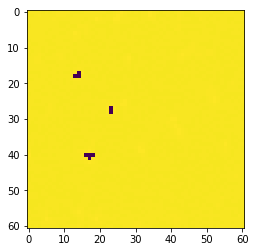

In [3]:
from sklearn.model_selection import train_test_split

from skimage import feature
import numpy as np
import cv2 as cv
import mahotas as mt
import scipy as sc
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.svm import LinearSVC
from skimage import feature
import numpy as np
from skimage import feature
import numpy as np
numPoints=24
radius=6
eps=1e-7
lung_image=[]
labels=[]
i=0
for lung_dir_path in glob.glob("/home/rishotics/somita/patches/*"):
    i=int(lung_dir_path[36:-5])
    
    if(i>=1 and i <=59):
        label=0
    elif(i>59 and i<=109):
        label=1
    else:
        label=2
    
    image=cv.imread(lung_dir_path,0)
    if(i==7):
        plt.imshow(image)
        print(image)
    image=cv.resize(image,(timesteps,timesteps))
    
    
    rows,cols = image.shape
    M = cv.getRotationMatrix2D((cols/2,rows/2),90,1)
    image2 = cv.warpAffine(image,M,(cols,rows))
    
    rows,cols = image.shape
    M = cv.getRotationMatrix2D((cols/2,rows/2),-90,1)
    image3 = cv.warpAffine(image,M,(cols,rows))
    
    rows,cols = image.shape
    M = cv.getRotationMatrix2D((cols/2,rows/2),180,1)
    image4 = cv.warpAffine(image,M,(cols,rows))
    
    labels.append(label)
    labels.append(label)
    labels.append(label)
    labels.append(label)
    
    lung_image.append(image)
    lung_image.append(image2)
    lung_image.append(image3)
    lung_image.append(image4)
    
lung_image=np.array(lung_image)
labels=np.array(labels)
lung_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in lung_to_dict.items()}
label_id=np.array([lung_to_dict[x] for x in labels])
lung_image=np.reshape(lung_image,(161*4,timesteps*timesteps))
lung_image.shape

def glcm(i):
    textures = mt.features.haralick(i)

        # take the mean of it and return it
    ht_mean = textures.mean(axis=0)
    
    return ht_mean
import cv2 
from sklearn.preprocessing import normalize

def gabor_feature(i):
    ksize = 31
    kern = cv2.getGaborKernel((ksize, ksize), 4.0,np.pi*1.5, 10.0, 1, 0, ktype=cv2.CV_32F)
    res1 = cv2.filter2D(i, cv2.CV_8UC3, kern)
    def build_filters_sigma():
        gabor_sigma=[]
        ksize = 31
        for sigma in range(1,5):
            kern = cv2.getGaborKernel((ksize, ksize), sigma, np.pi/2, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            res1 = cv2.filter2D(i, cv2.CV_8UC3, kern)
            m=res1.mean()
            gabor_sigma.append(m)
        return gabor_sigma
    def build_filters_theta():
        gabor_theta=[]
        ksize = 31
        for theta in np.arange(0, np.pi/2, np.pi /8):
            kern = cv2.getGaborKernel((ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F)
            res1 = cv2.filter2D(i, cv2.CV_8UC3, kern)
            m=res1.mean()
            gabor_theta.append(m)
        return gabor_theta 


    gabor_features=[]
    mea1 = build_filters_sigma()
    mea2= build_filters_theta()
    gabor_features=mea1+mea2
    gabor_features=np.reshape(gabor_features,-1)
    return gabor_features
data = []
labels = []

def LBP_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    
    
    lbp = feature.local_binary_pattern(gray, numPoints,radius, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),
    range=(0, numPoints + 2))
    #normalize the histogram
    hist = hist.astype("float")
    hist /= (hist.sum() + eps)
    #hist = hist.describe()
    return (pd.Series(hist).describe())
j=0



X=lung_image
X=normalize(X)
from keras.utils import to_categorical
r,w=X.shape
print(r)
print(w)

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


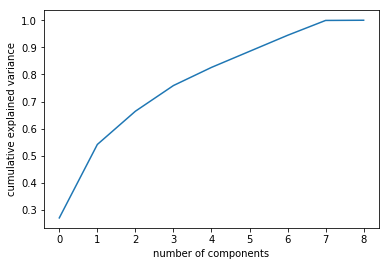

In [4]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [5]:

from sklearn.manifold import Isomap
model = Isomap(n_components=timesteps*timesteps)
X = model.fit_transform(X)
X.shape

(644, 9)

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X, label_id, test_size=0.20, random_state=42)
y_train = to_categorical(y_train)
y_valid=to_categorical(y_valid)
#y_train = to_categorical(y_train)
#y_valid=to_categorical(y_valid)
print(x_valid.shape)
print(y_valid.shape)

(129, 9)
(129, 3)


In [7]:


def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

In [8]:


print("Size of:")
print("- Training-set:\t\t{}".format(len(y_train)))
print("- Validation-set:\t{}".format(len(y_valid)))
 

Size of:
- Training-set:		515
- Validation-set:	129


In [9]:
learning_rate = 0.002 # The optimization initial learning rate
epochs = 10000     # Total number of training epochs
batch_size = 20      # Training batch size
display_freq = 10    # Frequency of displaying the training results

In [10]:
num_hidden_units = 128*2 # Number of hidden units of the RNN


In [11]:
def weight_variable(shape):
    """
    Create a weight variable with appropriate initialization
    :param name: weight name
    :param shape: weight shape
    :return: initialized weight variable
    """
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W',
                           dtype=tf.float32,
                           shape=shape,
                           initializer=initer)

def bias_variable(shape):
    """
    Create a bias variable with appropriate initialization
    :param name: bias variable name
    :param shape: bias variable shape
    :return: initialized bias variable
    """
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b',
                           dtype=tf.float32,
                           initializer=initial)

In [12]:
def BiRNN(x, weights, biases, timesteps, num_hidden):
    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, num_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, num_input)
    x = tf.unstack(x, timesteps, 1)

    # Define lstm cells with tensorflow
    # Forward direction cell
    lstm_fw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)
    # Backward direction cell
    lstm_bw_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get BiRNN cell output
    outputs, _, _ = rnn.static_bidirectional_rnn(lstm_fw_cell, lstm_bw_cell, x,
                                                 dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights) + biases

In [13]:

# Placeholders for inputs (x) and outputs(y)
x = tf.placeholder(tf.float32, shape=[None, timesteps, num_input], name='X')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')

In [14]:
# create weight matrix initialized randomely from N~(0, 0.01)
W = weight_variable(shape=[2*num_hidden_units, n_classes])

# create bias vector initialized as zero
b = bias_variable(shape=[n_classes])

output_logits = BiRNN(x, W, b, timesteps, num_hidden_units)
y_pred = tf.nn.softmax(output_logits)

In [15]:

# Model predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')

# Define the loss function, optimizer, and accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [16]:
# Creating the op for initializing all variables
init = tf.global_variables_initializer()


In [17]:
sess = tf.InteractiveSession()
sess.run(init)
global_step = 0
# Number of training iterations in each epoch
num_tr_iter = int(len(y_train) / batch_size)
for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch + 1))
    x_train, y_train = randomize(x_train, y_train)
    for iteration in range(num_tr_iter):
        global_step += 1
        start = iteration * batch_size
        end = (iteration + 1) * batch_size
        x_batch, y_batch = get_next_batch(x_train, y_train, start, end)
        x_batch = x_batch.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % display_freq == 0:
            # Calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy],
                                             feed_dict=feed_dict_batch)

            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # Run validation after every epoch

    feed_dict_valid = {x: x_valid[:1000].reshape((-1, timesteps, num_input)), y: y_valid[:1000]}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')

Training epoch: 1
iter   0:	 Loss=1.09,	Training Accuracy=75.0%
iter  10:	 Loss=1.03,	Training Accuracy=55.0%
iter  20:	 Loss=0.79,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.83, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.81,	Training Accuracy=50.0%
iter  10:	 Loss=0.73,	Training Accuracy=60.0%
iter  20:	 Loss=0.83,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.80, validation accuracy: 61.2%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.90,	Training Accuracy=45.0%
iter  10:	 Loss=0.85,	Training Accuracy=50.0%
iter  20:	 Loss=0.68,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3, validation loss: 0.75, validation accuracy: 62.8%
---------------------------------------------------------
Trai

iter   0:	 Loss=0.65,	Training Accuracy=70.0%
iter  10:	 Loss=0.79,	Training Accuracy=55.0%
iter  20:	 Loss=0.82,	Training Accuracy=45.0%
---------------------------------------------------------
Epoch: 26, validation loss: 0.77, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 27
iter   0:	 Loss=0.73,	Training Accuracy=50.0%
iter  10:	 Loss=0.73,	Training Accuracy=70.0%
iter  20:	 Loss=0.97,	Training Accuracy=40.0%
---------------------------------------------------------
Epoch: 27, validation loss: 0.74, validation accuracy: 62.0%
---------------------------------------------------------
Training epoch: 28
iter   0:	 Loss=0.62,	Training Accuracy=70.0%
iter  10:	 Loss=0.78,	Training Accuracy=75.0%
iter  20:	 Loss=0.75,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 28, validation loss: 0.74, validation accuracy: 62.0%
---------------------------------------------------------
Training epoch: 2

iter   0:	 Loss=0.67,	Training Accuracy=65.0%
iter  10:	 Loss=0.77,	Training Accuracy=50.0%
iter  20:	 Loss=0.63,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 51, validation loss: 0.76, validation accuracy: 62.8%
---------------------------------------------------------
Training epoch: 52
iter   0:	 Loss=0.57,	Training Accuracy=80.0%
iter  10:	 Loss=0.71,	Training Accuracy=55.0%
iter  20:	 Loss=0.79,	Training Accuracy=45.0%
---------------------------------------------------------
Epoch: 52, validation loss: 0.75, validation accuracy: 62.8%
---------------------------------------------------------
Training epoch: 53
iter   0:	 Loss=0.54,	Training Accuracy=80.0%
iter  10:	 Loss=0.76,	Training Accuracy=70.0%
iter  20:	 Loss=0.73,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 53, validation loss: 0.75, validation accuracy: 62.8%
---------------------------------------------------------
Training epoch: 5

---------------------------------------------------------
Epoch: 76, validation loss: 0.74, validation accuracy: 62.0%
---------------------------------------------------------
Training epoch: 77
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.77,	Training Accuracy=50.0%
iter  20:	 Loss=0.64,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 77, validation loss: 0.76, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 78
iter   0:	 Loss=0.66,	Training Accuracy=60.0%
iter  10:	 Loss=0.74,	Training Accuracy=65.0%
iter  20:	 Loss=0.53,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 78, validation loss: 0.75, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 79
iter   0:	 Loss=0.80,	Training Accuracy=50.0%
iter  10:	 Loss=0.73,	Training Accuracy=55.0%
iter  20:	 Loss=0.64,	Training Accuracy=55.0

iter  20:	 Loss=0.70,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 101, validation loss: 0.75, validation accuracy: 61.2%
---------------------------------------------------------
Training epoch: 102
iter   0:	 Loss=0.69,	Training Accuracy=65.0%
iter  10:	 Loss=0.67,	Training Accuracy=60.0%
iter  20:	 Loss=0.70,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 102, validation loss: 0.76, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 103
iter   0:	 Loss=0.63,	Training Accuracy=70.0%
iter  10:	 Loss=0.68,	Training Accuracy=55.0%
iter  20:	 Loss=0.50,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 103, validation loss: 0.76, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 104
iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.48,	Training Accurac

iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.72,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 126, validation loss: 0.76, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 127
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.69,	Training Accuracy=55.0%
iter  20:	 Loss=0.64,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 127, validation loss: 0.78, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 128
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.59,	Training Accuracy=70.0%
iter  20:	 Loss=0.64,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 128, validation loss: 0.76, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 129
iter   0:	 Loss=0.61,	Training Accurac

iter   0:	 Loss=0.58,	Training Accuracy=75.0%
iter  10:	 Loss=0.71,	Training Accuracy=55.0%
iter  20:	 Loss=0.60,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 151, validation loss: 0.78, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 152
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.63,	Training Accuracy=60.0%
iter  20:	 Loss=0.51,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 152, validation loss: 0.80, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 153
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.64,	Training Accuracy=75.0%
iter  20:	 Loss=0.63,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 153, validation loss: 0.76, validation accuracy: 58.9%
---------------------------------------------------------
Training epo

---------------------------------------------------------
Epoch: 176, validation loss: 0.83, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 177
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 177, validation loss: 0.84, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 178
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.67,	Training Accuracy=55.0%
iter  20:	 Loss=0.66,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 178, validation loss: 0.80, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 179
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.59,	Training Accurac

---------------------------------------------------------
Epoch: 201, validation loss: 0.84, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 202
iter   0:	 Loss=0.62,	Training Accuracy=60.0%
iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 202, validation loss: 0.86, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 203
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.70,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 203, validation loss: 0.82, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 204
iter   0:	 Loss=0.64,	Training Accuracy=60.0%
iter  10:	 Loss=0.58,	Training Accuracy=70.0%
iter  20:	 Loss=0.55,	Training Accurac

iter  20:	 Loss=0.68,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 226, validation loss: 0.93, validation accuracy: 61.2%
---------------------------------------------------------
Training epoch: 227
iter   0:	 Loss=0.57,	Training Accuracy=60.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 227, validation loss: 0.88, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 228
iter   0:	 Loss=0.40,	Training Accuracy=100.0%
iter  10:	 Loss=0.67,	Training Accuracy=60.0%
iter  20:	 Loss=0.37,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 228, validation loss: 0.93, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 229
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.61,	Training Accura

iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 251, validation loss: 0.92, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 252
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.63,	Training Accuracy=55.0%
iter  20:	 Loss=0.40,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 252, validation loss: 0.95, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 253
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.47,	Training Accuracy=85.0%
iter  20:	 Loss=0.68,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 253, validation loss: 0.94, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 254
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.65,	Training Accurac

---------------------------------------------------------
Epoch: 276, validation loss: 0.94, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 277
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.59,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 277, validation loss: 0.96, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 278
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 278, validation loss: 0.96, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 279
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.69,	Training Accurac

---------------------------------------------------------
Epoch: 301, validation loss: 0.97, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 302
iter   0:	 Loss=0.49,	Training Accuracy=85.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.61,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 302, validation loss: 1.00, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 303
iter   0:	 Loss=0.50,	Training Accuracy=85.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 303, validation loss: 0.96, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 304
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accurac

---------------------------------------------------------
Epoch: 326, validation loss: 0.98, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 327
iter   0:	 Loss=0.62,	Training Accuracy=60.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 327, validation loss: 1.01, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 328
iter   0:	 Loss=0.64,	Training Accuracy=65.0%
iter  10:	 Loss=0.60,	Training Accuracy=60.0%
iter  20:	 Loss=0.75,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 328, validation loss: 0.97, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 329
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training Accuracy=60.0%
iter  20:	 Loss=0.42,	Training Accurac

---------------------------------------------------------
Epoch: 351, validation loss: 1.09, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 352
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.72,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 352, validation loss: 1.06, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 353
iter   0:	 Loss=0.57,	Training Accuracy=60.0%
iter  10:	 Loss=0.52,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 353, validation loss: 1.06, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 354
iter   0:	 Loss=0.20,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accurac

iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.57,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 377, validation loss: 1.06, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 378
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.58,	Training Accuracy=60.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 378, validation loss: 1.04, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 379
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.55,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 379, validation loss: 1.09, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 380
iter   0:	 Loss=0.46,	Training Accurac

iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 402, validation loss: 1.03, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 403
iter   0:	 Loss=0.63,	Training Accuracy=55.0%
iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 403, validation loss: 1.06, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 404
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 404, validation loss: 1.06, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 405
iter   0:	 Loss=0.36,	Training Accurac

iter  20:	 Loss=0.44,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 427, validation loss: 1.05, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 428
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.60,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 428, validation loss: 1.05, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 429
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.50,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 429, validation loss: 1.08, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 430
iter   0:	 Loss=0.35,	Training Accuracy=95.0%
iter  10:	 Loss=0.59,	Training Accurac

---------------------------------------------------------
Epoch: 452, validation loss: 1.13, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 453
iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.63,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 453, validation loss: 1.16, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 454
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 454, validation loss: 1.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 455
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.50,	Training Accurac

---------------------------------------------------------
Epoch: 477, validation loss: 1.17, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 478
iter   0:	 Loss=0.52,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 478, validation loss: 1.16, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 479
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.57,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 479, validation loss: 1.22, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 480
iter   0:	 Loss=0.64,	Training Accuracy=65.0%
iter  10:	 Loss=0.63,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accurac

---------------------------------------------------------
Epoch: 502, validation loss: 1.21, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 503
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.62,	Training Accuracy=60.0%
iter  20:	 Loss=0.58,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 503, validation loss: 1.22, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 504
iter   0:	 Loss=0.63,	Training Accuracy=65.0%
iter  10:	 Loss=0.54,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 504, validation loss: 1.20, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 505
iter   0:	 Loss=0.47,	Training Accuracy=85.0%
iter  10:	 Loss=0.39,	Training Accuracy=90.0%
iter  20:	 Loss=0.70,	Training Accurac

---------------------------------------------------------
Epoch: 527, validation loss: 1.15, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 528
iter   0:	 Loss=0.44,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 528, validation loss: 1.24, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 529
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.64,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 529, validation loss: 1.21, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 530
iter   0:	 Loss=0.55,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accurac

iter  10:	 Loss=0.59,	Training Accuracy=65.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 552, validation loss: 1.17, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 553
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 553, validation loss: 1.22, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 554
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.70,	Training Accuracy=55.0%
iter  20:	 Loss=0.75,	Training Accuracy=35.0%
---------------------------------------------------------
Epoch: 554, validation loss: 1.16, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 555
iter   0:	 Loss=0.55,	Training Accurac

iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.59,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 577, validation loss: 1.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 578
iter   0:	 Loss=0.36,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.63,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 578, validation loss: 1.23, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 579
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.27,	Training Accuracy=90.0%
iter  20:	 Loss=0.61,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 579, validation loss: 1.22, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 580
iter   0:	 Loss=0.42,	Training Accurac

iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 602, validation loss: 1.24, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 603
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 603, validation loss: 1.29, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 604
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.57,	Training Accuracy=70.0%
iter  20:	 Loss=0.55,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 604, validation loss: 1.23, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 605
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.50,	Training Accurac

iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 627, validation loss: 1.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 628
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 628, validation loss: 1.24, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 629
iter   0:	 Loss=0.59,	Training Accuracy=55.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 629, validation loss: 1.20, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 630
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.46,	Training Accurac

iter  10:	 Loss=0.78,	Training Accuracy=45.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 652, validation loss: 1.28, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 653
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.74,	Training Accuracy=55.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 653, validation loss: 1.26, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 654
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 654, validation loss: 1.29, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 655
iter   0:	 Loss=0.44,	Training Accurac

iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 677, validation loss: 1.29, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 678
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 678, validation loss: 1.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 679
iter   0:	 Loss=0.45,	Training Accuracy=85.0%
iter  10:	 Loss=0.62,	Training Accuracy=55.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 679, validation loss: 1.23, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 680
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.56,	Training Accurac

---------------------------------------------------------
Epoch: 702, validation loss: 1.31, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 703
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 703, validation loss: 1.34, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 704
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=85.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 704, validation loss: 1.32, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 705
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accurac

iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 728, validation loss: 1.30, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 729
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 729, validation loss: 1.38, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 730
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.35,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 730, validation loss: 1.25, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 731
iter   0:	 Loss=0.63,	Training Accurac

iter  10:	 Loss=0.29,	Training Accuracy=85.0%
iter  20:	 Loss=0.62,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 753, validation loss: 1.29, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 754
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 754, validation loss: 1.28, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 755
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.27,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 755, validation loss: 1.27, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 756
iter   0:	 Loss=0.55,	Training Accurac

iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 778, validation loss: 1.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 779
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.61,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 779, validation loss: 1.27, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 780
iter   0:	 Loss=0.54,	Training Accuracy=60.0%
iter  10:	 Loss=0.64,	Training Accuracy=60.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 780, validation loss: 1.28, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 781
iter   0:	 Loss=0.46,	Training Accuracy=90.0%
iter  10:	 Loss=0.57,	Training Accurac

iter  20:	 Loss=0.35,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 803, validation loss: 1.26, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 804
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 804, validation loss: 1.27, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 805
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 805, validation loss: 1.28, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 806
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.49,	Training Accurac

---------------------------------------------------------
Epoch: 828, validation loss: 1.29, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 829
iter   0:	 Loss=0.58,	Training Accuracy=60.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 829, validation loss: 1.32, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 830
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 830, validation loss: 1.31, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 831
iter   0:	 Loss=0.65,	Training Accuracy=70.0%
iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.28,	Training Accurac

iter  10:	 Loss=0.52,	Training Accuracy=60.0%
iter  20:	 Loss=0.46,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 854, validation loss: 1.27, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 855
iter   0:	 Loss=0.26,	Training Accuracy=95.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 855, validation loss: 1.26, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 856
iter   0:	 Loss=0.65,	Training Accuracy=60.0%
iter  10:	 Loss=0.21,	Training Accuracy=90.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 856, validation loss: 1.29, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 857
iter   0:	 Loss=0.67,	Training Accurac

iter  20:	 Loss=0.51,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 879, validation loss: 1.27, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 880
iter   0:	 Loss=0.28,	Training Accuracy=95.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.69,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 880, validation loss: 1.23, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 881
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=60.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 881, validation loss: 1.20, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 882
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.53,	Training Accurac

iter  20:	 Loss=0.48,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 904, validation loss: 1.24, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 905
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.31,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 905, validation loss: 1.23, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 906
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.49,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 906, validation loss: 1.22, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 907
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.72,	Training Accurac

iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 929, validation loss: 1.24, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 930
iter   0:	 Loss=0.54,	Training Accuracy=60.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 930, validation loss: 1.25, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 931
iter   0:	 Loss=0.31,	Training Accuracy=85.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 931, validation loss: 1.23, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 932
iter   0:	 Loss=0.44,	Training Accurac

iter  10:	 Loss=0.63,	Training Accuracy=50.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 954, validation loss: 1.27, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 955
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 955, validation loss: 1.29, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 956
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 956, validation loss: 1.30, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 957
iter   0:	 Loss=0.57,	Training Accurac

---------------------------------------------------------
Epoch: 979, validation loss: 1.28, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 980
iter   0:	 Loss=0.39,	Training Accuracy=95.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 980, validation loss: 1.30, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 981
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 981, validation loss: 1.31, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 982
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.29,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accurac

iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1004, validation loss: 1.34, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1005
iter   0:	 Loss=0.36,	Training Accuracy=75.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1005, validation loss: 1.30, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1006
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.34,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1006, validation loss: 1.34, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1007
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.60,	Training A

---------------------------------------------------------
Epoch: 1029, validation loss: 1.22, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1030
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1030, validation loss: 1.31, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1031
iter   0:	 Loss=0.56,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.68,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1031, validation loss: 1.33, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1032
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training A

iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1054, validation loss: 1.34, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1055
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.62,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 1055, validation loss: 1.40, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1056
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1056, validation loss: 1.31, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1057
iter   0:	 Loss=0.27,	Training Accuracy=95.0%
iter  10:	 Loss=0.51,	Training A

iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1079, validation loss: 1.38, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1080
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=85.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1080, validation loss: 1.38, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1081
iter   0:	 Loss=0.39,	Training Accuracy=90.0%
iter  10:	 Loss=0.73,	Training Accuracy=55.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1081, validation loss: 1.38, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1082
iter   0:	 Loss=0.66,	Training Accuracy=65.0%
iter  10:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 1104, validation loss: 1.35, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1105
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.27,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 1105, validation loss: 1.35, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 1106
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.55,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1106, validation loss: 1.37, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1107
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.28,	Training A

iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1129, validation loss: 1.34, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1130
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1130, validation loss: 1.37, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1131
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1131, validation loss: 1.34, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1132
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training A

---------------------------------------------------------
Epoch: 1154, validation loss: 1.39, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1155
iter   0:	 Loss=0.60,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1155, validation loss: 1.38, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1156
iter   0:	 Loss=0.46,	Training Accuracy=90.0%
iter  10:	 Loss=0.30,	Training Accuracy=90.0%
iter  20:	 Loss=0.49,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1156, validation loss: 1.40, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1157
iter   0:	 Loss=0.54,	Training Accuracy=65.0%
iter  10:	 Loss=0.76,	Training Accuracy=45.0%
iter  20:	 Loss=0.29,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=60.0%
iter  20:	 Loss=0.59,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1180, validation loss: 1.19, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1181
iter   0:	 Loss=0.21,	Training Accuracy=100.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1181, validation loss: 1.19, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1182
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1182, validation loss: 1.20, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1183
iter   0:	 Loss=0.52,	Training 

iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1205, validation loss: 1.27, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 1206
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1206, validation loss: 1.28, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 1207
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training Accuracy=80.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1207, validation loss: 1.26, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1208
iter   0:	 Loss=0.39,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1230, validation loss: 1.25, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1231
iter   0:	 Loss=0.30,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1231, validation loss: 1.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1232
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1232, validation loss: 1.27, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1233
iter   0:	 Loss=0.47,	Training Accuracy=85.0%
iter  10:	 Loss=0.39,	Training A

iter  10:	 Loss=0.60,	Training Accuracy=70.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1255, validation loss: 1.34, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1256
iter   0:	 Loss=0.34,	Training Accuracy=95.0%
iter  10:	 Loss=0.40,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1256, validation loss: 1.32, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1257
iter   0:	 Loss=0.50,	Training Accuracy=65.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1257, validation loss: 1.33, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1258
iter   0:	 Loss=0.47,	Training A

iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1280, validation loss: 1.34, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 1281
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1281, validation loss: 1.35, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1282
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1282, validation loss: 1.33, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1283
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training A

iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1305, validation loss: 1.31, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 1306
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.51,	Training Accuracy=80.0%
iter  20:	 Loss=0.32,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 1306, validation loss: 1.28, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1307
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1307, validation loss: 1.25, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1308
iter   0:	 Loss=0.30,	Training A

iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1330, validation loss: 1.32, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1331
iter   0:	 Loss=0.26,	Training Accuracy=85.0%
iter  10:	 Loss=0.66,	Training Accuracy=65.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1331, validation loss: 1.30, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1332
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.62,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1332, validation loss: 1.36, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 1333
iter   0:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 1354, validation loss: 1.41, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1355
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=85.0%
iter  20:	 Loss=0.65,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1355, validation loss: 1.42, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 1356
iter   0:	 Loss=0.54,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1356, validation loss: 1.43, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1357
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.45,	Training Accuracy=85.0%
iter  20:	 Loss=0.56,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.37,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 1380, validation loss: 1.35, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1381
iter   0:	 Loss=0.47,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1381, validation loss: 1.31, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 1382
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.24,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 1382, validation loss: 1.34, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1383
iter   0:	 Loss=0.61,	Training A

iter  10:	 Loss=0.30,	Training Accuracy=85.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1405, validation loss: 1.41, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1406
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1406, validation loss: 1.38, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1407
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=85.0%
iter  20:	 Loss=0.65,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 1407, validation loss: 1.35, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1408
iter   0:	 Loss=0.58,	Training A

iter  20:	 Loss=0.62,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1430, validation loss: 1.41, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1431
iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.43,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1431, validation loss: 1.41, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 1432
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1432, validation loss: 1.41, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1433
iter   0:	 Loss=0.58,	Training Accuracy=55.0%
iter  10:	 Loss=0.64,	Training A

---------------------------------------------------------
Epoch: 1455, validation loss: 1.25, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1456
iter   0:	 Loss=0.67,	Training Accuracy=60.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1456, validation loss: 1.24, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1457
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.62,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1457, validation loss: 1.25, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1458
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.52,	Training Accuracy=60.0%
iter  20:	 Loss=0.31,	Training A

iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 1481, validation loss: 1.21, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 1482
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1482, validation loss: 1.21, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1483
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1483, validation loss: 1.22, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1484
iter   0:	 Loss=0.39,	Training A

---------------------------------------------------------
Epoch: 1506, validation loss: 1.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1507
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.59,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1507, validation loss: 1.26, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1508
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1508, validation loss: 1.24, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1509
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.58,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training A

iter  10:	 Loss=0.74,	Training Accuracy=50.0%
iter  20:	 Loss=0.28,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 1532, validation loss: 1.27, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1533
iter   0:	 Loss=0.50,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1533, validation loss: 1.31, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1534
iter   0:	 Loss=0.40,	Training Accuracy=70.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.59,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1534, validation loss: 1.26, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1535
iter   0:	 Loss=0.41,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=70.0%
iter  20:	 Loss=0.47,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1557, validation loss: 1.43, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1558
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.32,	Training Accuracy=95.0%
iter  20:	 Loss=0.69,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1558, validation loss: 1.40, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1559
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1559, validation loss: 1.41, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1560
iter   0:	 Loss=0.64,	Training A

iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1582, validation loss: 1.45, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1583
iter   0:	 Loss=0.31,	Training Accuracy=75.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1583, validation loss: 1.39, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1584
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1584, validation loss: 1.43, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 1585
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training A

iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1607, validation loss: 1.34, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1608
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1608, validation loss: 1.32, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1609
iter   0:	 Loss=0.38,	Training Accuracy=75.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1609, validation loss: 1.32, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1610
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.59,	Training A

iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1632, validation loss: 1.38, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1633
iter   0:	 Loss=0.40,	Training Accuracy=90.0%
iter  10:	 Loss=0.60,	Training Accuracy=55.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1633, validation loss: 1.37, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 1634
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1634, validation loss: 1.39, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 1635
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.26,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=55.0%
iter  20:	 Loss=0.48,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1658, validation loss: 1.53, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1659
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1659, validation loss: 1.57, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1660
iter   0:	 Loss=0.37,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1660, validation loss: 1.42, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1661
iter   0:	 Loss=0.50,	Training A

---------------------------------------------------------
Epoch: 1683, validation loss: 1.45, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1684
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1684, validation loss: 1.45, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1685
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1685, validation loss: 1.44, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1686
iter   0:	 Loss=0.68,	Training Accuracy=50.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 1708, validation loss: 1.43, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 1709
iter   0:	 Loss=0.48,	Training Accuracy=65.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1709, validation loss: 1.43, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1710
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.60,	Training Accuracy=55.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1710, validation loss: 1.44, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1711
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.34,	Training Accuracy=95.0%
iter  20:	 Loss=0.78,	Training A

---------------------------------------------------------
Epoch: 1733, validation loss: 1.34, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1734
iter   0:	 Loss=0.21,	Training Accuracy=85.0%
iter  10:	 Loss=0.63,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1734, validation loss: 1.34, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 1735
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1735, validation loss: 1.34, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1736
iter   0:	 Loss=0.47,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.32,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1758, validation loss: 1.41, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1759
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.25,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 1759, validation loss: 1.42, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1760
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1760, validation loss: 1.47, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1761
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.50,	Training A

iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1783, validation loss: 1.49, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 1784
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1784, validation loss: 1.46, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1785
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.31,	Training Accuracy=100.0%
iter  20:	 Loss=0.55,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 1785, validation loss: 1.46, validation accuracy: 59.7%
---------------------------------------------------------
Traini

iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1808, validation loss: 1.50, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1809
iter   0:	 Loss=0.31,	Training Accuracy=95.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1809, validation loss: 1.50, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1810
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1810, validation loss: 1.51, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1811
iter   0:	 Loss=0.47,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1833, validation loss: 1.41, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1834
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=65.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1834, validation loss: 1.34, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1835
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.56,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 1835, validation loss: 1.34, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1836
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.44,	Training A

---------------------------------------------------------
Epoch: 1858, validation loss: 1.54, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1859
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.61,	Training Accuracy=55.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 1859, validation loss: 1.55, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1860
iter   0:	 Loss=0.52,	Training Accuracy=80.0%
iter  10:	 Loss=0.68,	Training Accuracy=60.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1860, validation loss: 1.55, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1861
iter   0:	 Loss=0.45,	Training Accuracy=85.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training A

---------------------------------------------------------
Epoch: 1883, validation loss: 1.53, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 1884
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.55,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1884, validation loss: 1.53, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1885
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1885, validation loss: 1.53, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1886
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.50,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1909, validation loss: 1.58, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 1910
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1910, validation loss: 1.54, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 1911
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1911, validation loss: 1.59, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 1912
iter   0:	 Loss=0.34,	Training A

iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1934, validation loss: 1.53, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 1935
iter   0:	 Loss=0.74,	Training Accuracy=50.0%
iter  10:	 Loss=0.61,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1935, validation loss: 1.50, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 1936
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1936, validation loss: 1.45, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 1937
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.63,	Training A

iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1959, validation loss: 1.46, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1960
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 1960, validation loss: 1.44, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 1961
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.24,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 1961, validation loss: 1.42, validation accuracy: 56.6%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1984, validation loss: 1.46, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 1985
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.25,	Training Accuracy=95.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 1985, validation loss: 1.46, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1986
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.29,	Training Accuracy=95.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 1986, validation loss: 1.46, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 1987
iter   0:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 2008, validation loss: 1.41, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2009
iter   0:	 Loss=0.40,	Training Accuracy=70.0%
iter  10:	 Loss=0.55,	Training Accuracy=60.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2009, validation loss: 1.43, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2010
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2010, validation loss: 1.42, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2011
iter   0:	 Loss=0.33,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.60,	Training A

iter  10:	 Loss=0.59,	Training Accuracy=65.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2034, validation loss: 1.48, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2035
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2035, validation loss: 1.49, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2036
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 2036, validation loss: 1.50, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2037
iter   0:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 2058, validation loss: 1.48, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2059
iter   0:	 Loss=0.32,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2059, validation loss: 1.51, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2060
iter   0:	 Loss=0.58,	Training Accuracy=75.0%
iter  10:	 Loss=0.30,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2060, validation loss: 1.51, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2061
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training A

iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2083, validation loss: 1.50, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2084
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2084, validation loss: 1.53, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2085
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2085, validation loss: 1.53, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2086
iter   0:	 Loss=0.35,	Training A

iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2108, validation loss: 1.56, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2109
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2109, validation loss: 1.46, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2110
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2110, validation loss: 1.50, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2111
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 2133, validation loss: 1.48, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2134
iter   0:	 Loss=0.56,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2134, validation loss: 1.49, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 2135
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.57,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 2135, validation loss: 1.49, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2136
iter   0:	 Loss=0.47,	Training Accuracy=85.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.67,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2159, validation loss: 1.48, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2160
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2160, validation loss: 1.49, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2161
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2161, validation loss: 1.53, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2162
iter   0:	 Loss=0.54,	Training A

iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2184, validation loss: 1.54, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2185
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2185, validation loss: 1.65, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2186
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.35,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2186, validation loss: 1.52, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2187
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.32,	Training A

---------------------------------------------------------
Epoch: 2209, validation loss: 1.47, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2210
iter   0:	 Loss=0.25,	Training Accuracy=100.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2210, validation loss: 1.48, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2211
iter   0:	 Loss=0.42,	Training Accuracy=90.0%
iter  10:	 Loss=0.61,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2211, validation loss: 1.48, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2212
iter   0:	 Loss=0.40,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.48,	Training 

---------------------------------------------------------
Epoch: 2234, validation loss: 1.47, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2235
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2235, validation loss: 1.47, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2236
iter   0:	 Loss=0.34,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=90.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2236, validation loss: 1.45, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2237
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2260, validation loss: 1.50, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2261
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2261, validation loss: 1.50, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2262
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2262, validation loss: 1.51, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2263
iter   0:	 Loss=0.49,	Training A

---------------------------------------------------------
Epoch: 2284, validation loss: 1.57, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2285
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2285, validation loss: 1.54, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2286
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2286, validation loss: 1.56, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2287
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.59,	Training A

---------------------------------------------------------
Epoch: 2309, validation loss: 1.56, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2310
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2310, validation loss: 1.51, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2311
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2311, validation loss: 1.59, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2312
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.31,	Training A

iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2334, validation loss: 1.58, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2335
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.66,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2335, validation loss: 1.60, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2336
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2336, validation loss: 1.61, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2337
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.65,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2359, validation loss: 1.58, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2360
iter   0:	 Loss=0.58,	Training Accuracy=60.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2360, validation loss: 1.60, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2361
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.55,	Training Accuracy=60.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2361, validation loss: 1.62, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2362
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2384, validation loss: 1.58, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2385
iter   0:	 Loss=0.42,	Training Accuracy=70.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2385, validation loss: 1.57, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2386
iter   0:	 Loss=0.70,	Training Accuracy=45.0%
iter  10:	 Loss=0.55,	Training Accuracy=65.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2386, validation loss: 1.59, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 2387
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2409, validation loss: 1.46, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2410
iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.53,	Training Accuracy=80.0%
iter  20:	 Loss=0.58,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 2410, validation loss: 1.48, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2411
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 2411, validation loss: 1.46, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2412
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training A

---------------------------------------------------------
Epoch: 2434, validation loss: 1.41, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2435
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2435, validation loss: 1.46, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2436
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.33,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2436, validation loss: 1.46, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2437
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training A

iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2460, validation loss: 1.54, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2461
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2461, validation loss: 1.55, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2462
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2462, validation loss: 1.56, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2463
iter   0:	 Loss=0.32,	Training A

iter  10:	 Loss=0.39,	Training Accuracy=90.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2485, validation loss: 1.57, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2486
iter   0:	 Loss=0.32,	Training Accuracy=90.0%
iter  10:	 Loss=0.53,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2486, validation loss: 1.55, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2487
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2487, validation loss: 1.56, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2488
iter   0:	 Loss=0.47,	Training A

iter  20:	 Loss=0.64,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2510, validation loss: 1.58, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2511
iter   0:	 Loss=0.44,	Training Accuracy=70.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.37,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2511, validation loss: 1.61, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2512
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2512, validation loss: 1.59, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2513
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training A

---------------------------------------------------------
Epoch: 2535, validation loss: 1.47, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2536
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.65,	Training Accuracy=55.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2536, validation loss: 1.47, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2537
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2537, validation loss: 1.51, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2538
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training A

iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.59,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2561, validation loss: 1.55, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2562
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2562, validation loss: 1.52, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2563
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.35,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 2563, validation loss: 1.52, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2564
iter   0:	 Loss=0.44,	Training A

iter  20:	 Loss=0.35,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2586, validation loss: 1.38, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 2587
iter   0:	 Loss=0.60,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2587, validation loss: 1.43, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2588
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2588, validation loss: 1.47, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2589
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.35,	Training A

iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2611, validation loss: 1.56, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2612
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.75,	Training Accuracy=50.0%
iter  20:	 Loss=0.39,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 2612, validation loss: 1.56, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2613
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2613, validation loss: 1.56, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2614
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training A

iter  20:	 Loss=0.36,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2636, validation loss: 1.53, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2637
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.64,	Training Accuracy=60.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2637, validation loss: 1.52, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 2638
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2638, validation loss: 1.51, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2639
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.44,	Training A

iter  10:	 Loss=0.56,	Training Accuracy=80.0%
iter  20:	 Loss=0.28,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 2661, validation loss: 1.50, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 2662
iter   0:	 Loss=0.29,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2662, validation loss: 1.51, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2663
iter   0:	 Loss=0.58,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2663, validation loss: 1.52, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2664
iter   0:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 2685, validation loss: 1.56, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2686
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2686, validation loss: 1.57, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2687
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training Accuracy=85.0%
iter  20:	 Loss=0.56,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2687, validation loss: 1.56, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 2688
iter   0:	 Loss=0.68,	Training Accuracy=55.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.35,	Training A

---------------------------------------------------------
Epoch: 2710, validation loss: 1.56, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2711
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2711, validation loss: 1.57, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 2712
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2712, validation loss: 1.58, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2713
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.32,	Training A

iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2735, validation loss: 1.63, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2736
iter   0:	 Loss=0.46,	Training Accuracy=65.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2736, validation loss: 1.57, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 2737
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2737, validation loss: 1.58, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2738
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.49,	Training A

iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.45,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2760, validation loss: 1.56, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2761
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2761, validation loss: 1.56, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2762
iter   0:	 Loss=0.57,	Training Accuracy=55.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.62,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 2762, validation loss: 1.54, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2763
iter   0:	 Loss=0.47,	Training A

iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2785, validation loss: 1.58, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2786
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2786, validation loss: 1.59, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2787
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2787, validation loss: 1.61, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2788
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training A

iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2810, validation loss: 1.46, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2811
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.29,	Training Accuracy=100.0%
iter  20:	 Loss=0.61,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2811, validation loss: 1.44, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2812
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training Accuracy=85.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2812, validation loss: 1.45, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2813
iter   0:	 Loss=0.32,	Training Accuracy=95.0%
iter  10:	 Loss=0.66,	Training 

iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2835, validation loss: 1.54, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2836
iter   0:	 Loss=0.30,	Training Accuracy=95.0%
iter  10:	 Loss=0.29,	Training Accuracy=90.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2836, validation loss: 1.53, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2837
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2837, validation loss: 1.52, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2838
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.43,	Training A

iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2860, validation loss: 1.58, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 2861
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.52,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2861, validation loss: 1.60, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2862
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2862, validation loss: 1.61, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2863
iter   0:	 Loss=0.35,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 2885, validation loss: 1.60, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2886
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.65,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 2886, validation loss: 1.60, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2887
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2887, validation loss: 1.61, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2888
iter   0:	 Loss=0.38,	Training Accuracy=90.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=90.0%
iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2911, validation loss: 1.70, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2912
iter   0:	 Loss=0.36,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2912, validation loss: 1.72, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2913
iter   0:	 Loss=0.37,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 2913, validation loss: 1.71, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2914
iter   0:	 Loss=0.47,	Training A

iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 2936, validation loss: 1.74, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 2937
iter   0:	 Loss=0.50,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training Accuracy=65.0%
iter  20:	 Loss=0.56,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 2937, validation loss: 1.76, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 2938
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.70,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 2938, validation loss: 1.77, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2939
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.49,	Training A

---------------------------------------------------------
Epoch: 2961, validation loss: 1.76, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2962
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2962, validation loss: 1.68, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 2963
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.30,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 2963, validation loss: 1.75, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 2964
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.45,	Training Accuracy=85.0%
iter  20:	 Loss=0.43,	Training A

---------------------------------------------------------
Epoch: 2986, validation loss: 1.82, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 2987
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.66,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 2987, validation loss: 1.83, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 2988
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 2988, validation loss: 1.85, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 2989
iter   0:	 Loss=0.61,	Training Accuracy=70.0%
iter  10:	 Loss=0.59,	Training Accuracy=60.0%
iter  20:	 Loss=0.48,	Training A

iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3011, validation loss: 1.85, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3012
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.33,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3012, validation loss: 1.83, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3013
iter   0:	 Loss=0.27,	Training Accuracy=90.0%
iter  10:	 Loss=0.54,	Training Accuracy=60.0%
iter  20:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3013, validation loss: 1.85, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3014
iter   0:	 Loss=0.31,	Training Accuracy=95.0%
iter  10:	 Loss=0.30,	Training A

---------------------------------------------------------
Epoch: 3036, validation loss: 1.90, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3037
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3037, validation loss: 1.92, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3038
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3038, validation loss: 1.92, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3039
iter   0:	 Loss=0.58,	Training Accuracy=60.0%
iter  10:	 Loss=0.29,	Training Accuracy=85.0%
iter  20:	 Loss=0.54,	Training A

---------------------------------------------------------
Epoch: 3061, validation loss: 1.87, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3062
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.56,	Training Accuracy=60.0%
iter  20:	 Loss=0.51,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3062, validation loss: 1.85, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3063
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.50,	Training Accuracy=60.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3063, validation loss: 1.87, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3064
iter   0:	 Loss=0.22,	Training Accuracy=95.0%
iter  10:	 Loss=0.63,	Training Accuracy=70.0%
iter  20:	 Loss=0.42,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=75.0%
iter  20:	 Loss=0.55,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3087, validation loss: 1.89, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3088
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3088, validation loss: 1.86, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3089
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.28,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3089, validation loss: 1.89, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3090
iter   0:	 Loss=0.40,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.58,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3112, validation loss: 1.92, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3113
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3113, validation loss: 1.88, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3114
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3114, validation loss: 1.88, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3115
iter   0:	 Loss=0.38,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3137, validation loss: 1.60, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3138
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3138, validation loss: 1.61, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3139
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.31,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3139, validation loss: 1.60, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3140
iter   0:	 Loss=0.51,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3162, validation loss: 1.60, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3163
iter   0:	 Loss=0.43,	Training Accuracy=90.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3163, validation loss: 1.58, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3164
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3164, validation loss: 1.62, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 3165
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training A

iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3187, validation loss: 1.63, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3188
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.62,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3188, validation loss: 1.66, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 3189
iter   0:	 Loss=0.56,	Training Accuracy=80.0%
iter  10:	 Loss=0.63,	Training Accuracy=65.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3189, validation loss: 1.67, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3190
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training A

---------------------------------------------------------
Epoch: 3212, validation loss: 1.68, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3213
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3213, validation loss: 1.72, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3214
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.61,	Training Accuracy=60.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3214, validation loss: 1.69, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3215
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.30,	Training Accuracy=95.0%
iter  20:	 Loss=0.37,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3238, validation loss: 1.71, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 3239
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3239, validation loss: 1.73, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3240
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3240, validation loss: 1.64, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3241
iter   0:	 Loss=0.54,	Training A

iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3263, validation loss: 1.75, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3264
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.57,	Training Accuracy=75.0%
iter  20:	 Loss=0.59,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 3264, validation loss: 1.72, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3265
iter   0:	 Loss=0.58,	Training Accuracy=60.0%
iter  10:	 Loss=0.49,	Training Accuracy=65.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3265, validation loss: 1.72, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3266
iter   0:	 Loss=0.48,	Training Accuracy=65.0%
iter  10:	 Loss=0.39,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3288, validation loss: 1.58, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3289
iter   0:	 Loss=0.38,	Training Accuracy=90.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3289, validation loss: 1.63, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3290
iter   0:	 Loss=0.65,	Training Accuracy=55.0%
iter  10:	 Loss=0.54,	Training Accuracy=60.0%
iter  20:	 Loss=0.35,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3290, validation loss: 1.54, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3291
iter   0:	 Loss=0.79,	Training A

iter  20:	 Loss=0.57,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3313, validation loss: 1.64, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3314
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training Accuracy=60.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3314, validation loss: 1.62, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3315
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3315, validation loss: 1.63, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3316
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.61,	Training A

iter  20:	 Loss=0.53,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3338, validation loss: 1.62, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3339
iter   0:	 Loss=0.61,	Training Accuracy=60.0%
iter  10:	 Loss=0.47,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3339, validation loss: 1.64, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 3340
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3340, validation loss: 1.62, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3341
iter   0:	 Loss=0.49,	Training Accuracy=65.0%
iter  10:	 Loss=0.47,	Training A

---------------------------------------------------------
Epoch: 3363, validation loss: 1.66, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3364
iter   0:	 Loss=0.33,	Training Accuracy=85.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3364, validation loss: 1.62, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3365
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3365, validation loss: 1.65, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 3366
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training A

---------------------------------------------------------
Epoch: 3388, validation loss: 1.66, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3389
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.51,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3389, validation loss: 1.63, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3390
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3390, validation loss: 1.65, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3391
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training A

---------------------------------------------------------
Epoch: 3413, validation loss: 1.68, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3414
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.50,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3414, validation loss: 1.70, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3415
iter   0:	 Loss=0.26,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3415, validation loss: 1.69, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3416
iter   0:	 Loss=0.44,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.53,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.32,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3438, validation loss: 1.59, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3439
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3439, validation loss: 1.57, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3440
iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.61,	Training Accuracy=60.0%
iter  20:	 Loss=0.37,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3440, validation loss: 1.59, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3441
iter   0:	 Loss=0.43,	Training A

---------------------------------------------------------
Epoch: 3463, validation loss: 1.64, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3464
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3464, validation loss: 1.63, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3465
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.35,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3465, validation loss: 1.64, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3466
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training A

---------------------------------------------------------
Epoch: 3488, validation loss: 1.58, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3489
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3489, validation loss: 1.59, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 3490
iter   0:	 Loss=0.31,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.42,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3490, validation loss: 1.59, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3491
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.54,	Training A

iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3513, validation loss: 1.67, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3514
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3514, validation loss: 1.66, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3515
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.31,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3515, validation loss: 1.64, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3516
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.31,	Training A

iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3539, validation loss: 1.71, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3540
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3540, validation loss: 1.72, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3541
iter   0:	 Loss=0.25,	Training Accuracy=95.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3541, validation loss: 1.67, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3542
iter   0:	 Loss=0.53,	Training A

---------------------------------------------------------
Epoch: 3564, validation loss: 1.77, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3565
iter   0:	 Loss=0.29,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3565, validation loss: 1.78, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3566
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3566, validation loss: 1.75, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3567
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.54,	Training A

iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.42,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3590, validation loss: 1.71, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 3591
iter   0:	 Loss=0.64,	Training Accuracy=65.0%
iter  10:	 Loss=0.30,	Training Accuracy=85.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3591, validation loss: 1.73, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 3592
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3592, validation loss: 1.71, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3593
iter   0:	 Loss=0.50,	Training A

iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3615, validation loss: 1.75, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3616
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3616, validation loss: 1.76, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3617
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3617, validation loss: 1.77, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3618
iter   0:	 Loss=0.44,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3640, validation loss: 1.60, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3641
iter   0:	 Loss=0.26,	Training Accuracy=90.0%
iter  10:	 Loss=0.35,	Training Accuracy=90.0%
iter  20:	 Loss=0.32,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3641, validation loss: 1.59, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3642
iter   0:	 Loss=0.25,	Training Accuracy=90.0%
iter  10:	 Loss=0.65,	Training Accuracy=50.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3642, validation loss: 1.61, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3643
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.56,	Training A

---------------------------------------------------------
Epoch: 3665, validation loss: 1.59, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3666
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3666, validation loss: 1.59, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3667
iter   0:	 Loss=0.63,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.29,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3667, validation loss: 1.61, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3668
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 3690, validation loss: 1.61, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3691
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.63,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3691, validation loss: 1.63, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3692
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.60,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 3692, validation loss: 1.65, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3693
iter   0:	 Loss=0.49,	Training Accuracy=65.0%
iter  10:	 Loss=0.42,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training A

iter  20:	 Loss=0.60,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3715, validation loss: 1.60, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3716
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3716, validation loss: 1.63, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3717
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.62,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3717, validation loss: 1.64, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3718
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3741, validation loss: 1.70, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 3742
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 3742, validation loss: 1.67, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3743
iter   0:	 Loss=0.55,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.34,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3743, validation loss: 1.70, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3744
iter   0:	 Loss=0.52,	Training A

iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3766, validation loss: 1.64, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3767
iter   0:	 Loss=0.53,	Training Accuracy=60.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3767, validation loss: 1.62, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3768
iter   0:	 Loss=0.63,	Training Accuracy=70.0%
iter  10:	 Loss=0.61,	Training Accuracy=55.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3768, validation loss: 1.62, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3769
iter   0:	 Loss=0.63,	Training Accuracy=60.0%
iter  10:	 Loss=0.52,	Training A

---------------------------------------------------------
Epoch: 3791, validation loss: 1.65, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3792
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3792, validation loss: 1.63, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3793
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3793, validation loss: 1.66, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3794
iter   0:	 Loss=0.28,	Training Accuracy=90.0%
iter  10:	 Loss=0.36,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 3816, validation loss: 1.66, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3817
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3817, validation loss: 1.65, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3818
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3818, validation loss: 1.68, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3819
iter   0:	 Loss=0.34,	Training Accuracy=95.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training A

---------------------------------------------------------
Epoch: 3841, validation loss: 1.61, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 3842
iter   0:	 Loss=0.34,	Training Accuracy=80.0%
iter  10:	 Loss=0.52,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3842, validation loss: 1.62, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3843
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=65.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 3843, validation loss: 1.62, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3844
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.42,	Training A

iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3866, validation loss: 1.72, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3867
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.40,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 3867, validation loss: 1.73, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3868
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.68,	Training Accuracy=60.0%
iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3868, validation loss: 1.72, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3869
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training A

iter  10:	 Loss=0.65,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3891, validation loss: 1.75, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 3892
iter   0:	 Loss=0.34,	Training Accuracy=80.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.63,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 3892, validation loss: 1.76, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3893
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.54,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3893, validation loss: 1.74, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3894
iter   0:	 Loss=0.41,	Training A

iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3916, validation loss: 1.76, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 3917
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 3917, validation loss: 1.76, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3918
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3918, validation loss: 1.76, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3919
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training A

---------------------------------------------------------
Epoch: 3941, validation loss: 1.64, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3942
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.64,	Training Accuracy=65.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3942, validation loss: 1.60, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3943
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3943, validation loss: 1.60, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 3944
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=85.0%
iter  20:	 Loss=0.31,	Training A

iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 3966, validation loss: 1.75, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 3967
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=85.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3967, validation loss: 1.74, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 3968
iter   0:	 Loss=0.40,	Training Accuracy=90.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3968, validation loss: 1.75, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 3969
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.37,	Training A

---------------------------------------------------------
Epoch: 3991, validation loss: 1.79, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 3992
iter   0:	 Loss=0.56,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 3992, validation loss: 1.85, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 3993
iter   0:	 Loss=0.29,	Training Accuracy=80.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 3993, validation loss: 1.82, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 3994
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training A

iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4016, validation loss: 1.74, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4017
iter   0:	 Loss=0.32,	Training Accuracy=90.0%
iter  10:	 Loss=0.61,	Training Accuracy=55.0%
iter  20:	 Loss=0.35,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 4017, validation loss: 1.70, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4018
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4018, validation loss: 1.74, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4019
iter   0:	 Loss=0.31,	Training Accuracy=85.0%
iter  10:	 Loss=0.47,	Training A

iter  20:	 Loss=0.39,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4041, validation loss: 1.82, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4042
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4042, validation loss: 1.79, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4043
iter   0:	 Loss=0.74,	Training Accuracy=50.0%
iter  10:	 Loss=0.53,	Training Accuracy=80.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4043, validation loss: 1.83, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4044
iter   0:	 Loss=0.62,	Training Accuracy=60.0%
iter  10:	 Loss=0.49,	Training A

iter  20:	 Loss=0.69,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4066, validation loss: 1.82, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4067
iter   0:	 Loss=0.57,	Training Accuracy=60.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4067, validation loss: 1.88, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4068
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4068, validation loss: 1.85, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4069
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.57,	Training A

---------------------------------------------------------
Epoch: 4091, validation loss: 1.73, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4092
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.32,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4092, validation loss: 1.73, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4093
iter   0:	 Loss=0.28,	Training Accuracy=95.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4093, validation loss: 1.73, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4094
iter   0:	 Loss=0.51,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.53,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 4116, validation loss: 1.74, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4117
iter   0:	 Loss=0.53,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4117, validation loss: 1.74, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4118
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4118, validation loss: 1.75, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4119
iter   0:	 Loss=0.50,	Training A

---------------------------------------------------------
Epoch: 4141, validation loss: 1.75, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4142
iter   0:	 Loss=0.41,	Training Accuracy=90.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.32,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4142, validation loss: 1.73, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4143
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4143, validation loss: 1.71, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4144
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.36,	Training A

iter  10:	 Loss=0.42,	Training Accuracy=90.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4166, validation loss: 1.68, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4167
iter   0:	 Loss=0.63,	Training Accuracy=55.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4167, validation loss: 1.70, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4168
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4168, validation loss: 1.72, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 4169
iter   0:	 Loss=0.42,	Training A

iter  20:	 Loss=0.27,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4191, validation loss: 1.79, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4192
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.92,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4192, validation loss: 1.83, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4193
iter   0:	 Loss=0.28,	Training Accuracy=95.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4193, validation loss: 1.66, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4194
iter   0:	 Loss=0.52,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training A

iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4216, validation loss: 1.76, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4217
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4217, validation loss: 1.75, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 4218
iter   0:	 Loss=0.57,	Training Accuracy=75.0%
iter  10:	 Loss=0.30,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4218, validation loss: 1.78, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4219
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.50,	Training A

iter  10:	 Loss=0.56,	Training Accuracy=75.0%
iter  20:	 Loss=0.32,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4241, validation loss: 1.78, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 4242
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4242, validation loss: 1.78, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4243
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.56,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4243, validation loss: 1.77, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4244
iter   0:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 4265, validation loss: 1.78, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4266
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4266, validation loss: 1.79, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4267
iter   0:	 Loss=0.59,	Training Accuracy=60.0%
iter  10:	 Loss=0.35,	Training Accuracy=80.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 4267, validation loss: 1.76, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4268
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=65.0%
iter  20:	 Loss=0.38,	Training A

iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4290, validation loss: 1.82, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4291
iter   0:	 Loss=0.61,	Training Accuracy=60.0%
iter  10:	 Loss=0.64,	Training Accuracy=55.0%
iter  20:	 Loss=0.49,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4291, validation loss: 1.79, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4292
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4292, validation loss: 1.82, validation accuracy: 52.7%
---------------------------------------------------------
Trainin

iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4315, validation loss: 1.80, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4316
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.27,	Training Accuracy=85.0%
iter  20:	 Loss=0.31,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4316, validation loss: 1.80, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 4317
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4317, validation loss: 1.84, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4318
iter   0:	 Loss=0.32,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.57,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 4340, validation loss: 1.78, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4341
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4341, validation loss: 1.80, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4342
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.60,	Training Accuracy=60.0%
iter  20:	 Loss=0.56,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4342, validation loss: 1.78, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4343
iter   0:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 4365, validation loss: 1.81, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4366
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4366, validation loss: 1.79, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4367
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4367, validation loss: 1.81, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4368
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.52,	Training A

iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4391, validation loss: 1.86, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 4392
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.41,	Training Accuracy=90.0%
iter  20:	 Loss=0.59,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4392, validation loss: 1.88, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4393
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.20,	Training Accuracy=100.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4393, validation loss: 1.88, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4394
iter   0:	 Loss=0.47,	Training 

iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4416, validation loss: 1.85, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4417
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.68,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 4417, validation loss: 1.86, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4418
iter   0:	 Loss=0.66,	Training Accuracy=60.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4418, validation loss: 1.87, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4419
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.34,	Training A

---------------------------------------------------------
Epoch: 4441, validation loss: 1.94, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4442
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4442, validation loss: 1.96, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4443
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.53,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 4443, validation loss: 1.97, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4444
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.62,	Training A

---------------------------------------------------------
Epoch: 4466, validation loss: 1.95, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4467
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.74,	Training Accuracy=45.0%
---------------------------------------------------------
Epoch: 4467, validation loss: 1.97, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4468
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4468, validation loss: 1.97, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4469
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 4491, validation loss: 1.96, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4492
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.51,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4492, validation loss: 1.99, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4493
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.68,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 4493, validation loss: 1.99, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4494
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training A

iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4516, validation loss: 1.79, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4517
iter   0:	 Loss=0.34,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4517, validation loss: 1.81, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4518
iter   0:	 Loss=0.65,	Training Accuracy=55.0%
iter  10:	 Loss=0.38,	Training Accuracy=90.0%
iter  20:	 Loss=0.49,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4518, validation loss: 1.82, validation accuracy: 56.6%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4541, validation loss: 1.87, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4542
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4542, validation loss: 1.86, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4543
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4543, validation loss: 1.85, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4544
iter   0:	 Loss=0.45,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4566, validation loss: 1.80, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4567
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 4567, validation loss: 1.79, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4568
iter   0:	 Loss=0.63,	Training Accuracy=60.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4568, validation loss: 1.82, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4569
iter   0:	 Loss=0.71,	Training A

iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4591, validation loss: 1.94, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4592
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=85.0%
iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4592, validation loss: 1.89, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4593
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4593, validation loss: 1.90, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4594
iter   0:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 4615, validation loss: 1.95, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 4616
iter   0:	 Loss=0.65,	Training Accuracy=60.0%
iter  10:	 Loss=0.28,	Training Accuracy=85.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4616, validation loss: 1.80, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4617
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4617, validation loss: 1.82, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4618
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training A

iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4640, validation loss: 1.85, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 4641
iter   0:	 Loss=0.65,	Training Accuracy=60.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4641, validation loss: 1.89, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4642
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.31,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 4642, validation loss: 1.91, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4643
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.49,	Training A

iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4665, validation loss: 1.86, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4666
iter   0:	 Loss=0.54,	Training Accuracy=65.0%
iter  10:	 Loss=0.68,	Training Accuracy=50.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4666, validation loss: 1.81, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4667
iter   0:	 Loss=0.59,	Training Accuracy=60.0%
iter  10:	 Loss=0.30,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4667, validation loss: 2.06, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4668
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training A

iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4690, validation loss: 1.84, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4691
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.34,	Training Accuracy=90.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4691, validation loss: 1.87, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4692
iter   0:	 Loss=0.50,	Training Accuracy=65.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4692, validation loss: 1.86, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4693
iter   0:	 Loss=0.34,	Training Accuracy=75.0%
iter  10:	 Loss=0.30,	Training A

---------------------------------------------------------
Epoch: 4715, validation loss: 1.90, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4716
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.70,	Training Accuracy=55.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4716, validation loss: 1.89, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4717
iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.61,	Training Accuracy=70.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4717, validation loss: 1.86, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 4718
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training A

iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4741, validation loss: 1.93, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4742
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4742, validation loss: 1.91, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 4743
iter   0:	 Loss=0.50,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.59,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 4743, validation loss: 1.93, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 4744
iter   0:	 Loss=0.36,	Training A

iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.56,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 4766, validation loss: 1.77, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 4767
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4767, validation loss: 1.78, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4768
iter   0:	 Loss=0.50,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4768, validation loss: 1.79, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4769
iter   0:	 Loss=0.54,	Training A

iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4791, validation loss: 1.85, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4792
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.27,	Training Accuracy=90.0%
iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4792, validation loss: 1.80, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4793
iter   0:	 Loss=0.52,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4793, validation loss: 1.80, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4794
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training A

iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4816, validation loss: 1.78, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 4817
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.61,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4817, validation loss: 1.81, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4818
iter   0:	 Loss=0.36,	Training Accuracy=90.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4818, validation loss: 1.83, validation accuracy: 51.9%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.62,	Training Accuracy=65.0%
iter  20:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4841, validation loss: 1.81, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4842
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4842, validation loss: 1.78, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4843
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4843, validation loss: 1.80, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 4844
iter   0:	 Loss=0.38,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4866, validation loss: 1.85, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4867
iter   0:	 Loss=0.41,	Training Accuracy=95.0%
iter  10:	 Loss=0.63,	Training Accuracy=65.0%
iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 4867, validation loss: 1.80, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4868
iter   0:	 Loss=0.35,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.34,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 4868, validation loss: 1.85, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4869
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training A

---------------------------------------------------------
Epoch: 4891, validation loss: 1.87, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 4892
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4892, validation loss: 1.87, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4893
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4893, validation loss: 1.85, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4894
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.61,	Training A

iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 4916, validation loss: 1.89, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 4917
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4917, validation loss: 1.90, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 4918
iter   0:	 Loss=0.44,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4918, validation loss: 1.89, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4919
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.37,	Training A

iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4941, validation loss: 1.62, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4942
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.72,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 4942, validation loss: 1.62, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4943
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.62,	Training Accuracy=65.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 4943, validation loss: 1.64, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 4944
iter   0:	 Loss=0.56,	Training A

iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.64,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4966, validation loss: 1.65, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 4967
iter   0:	 Loss=0.32,	Training Accuracy=90.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 4967, validation loss: 1.66, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 4968
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=85.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4968, validation loss: 1.65, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 4969
iter   0:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 4991, validation loss: 1.70, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 4992
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.34,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 4992, validation loss: 1.70, validation accuracy: 60.5%
---------------------------------------------------------
Training epoch: 4993
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 4993, validation loss: 1.72, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 4994
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.27,	Training A

iter  10:	 Loss=0.59,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5016, validation loss: 1.72, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5017
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5017, validation loss: 1.71, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 5018
iter   0:	 Loss=0.32,	Training Accuracy=95.0%
iter  10:	 Loss=0.36,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5018, validation loss: 1.71, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5019
iter   0:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 5040, validation loss: 1.72, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5041
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5041, validation loss: 1.74, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 5042
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5042, validation loss: 1.75, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5043
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training A

iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5065, validation loss: 1.77, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5066
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=70.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5066, validation loss: 1.80, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5067
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5067, validation loss: 1.79, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5068
iter   0:	 Loss=0.54,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5090, validation loss: 1.83, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5091
iter   0:	 Loss=0.59,	Training Accuracy=65.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5091, validation loss: 1.83, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5092
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5092, validation loss: 1.85, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 5093
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training A

iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5115, validation loss: 1.77, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5116
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.34,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 5116, validation loss: 1.76, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5117
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.65,	Training Accuracy=65.0%
iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5117, validation loss: 1.78, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5118
iter   0:	 Loss=0.57,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=60.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5140, validation loss: 1.77, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5141
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5141, validation loss: 1.76, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 5142
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.59,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5142, validation loss: 1.79, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 5143
iter   0:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 5164, validation loss: 1.77, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 5165
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.32,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5165, validation loss: 1.75, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5166
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5166, validation loss: 1.82, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5167
iter   0:	 Loss=0.37,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.66,	Training A

---------------------------------------------------------
Epoch: 5189, validation loss: 1.72, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5190
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5190, validation loss: 1.76, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5191
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=65.0%
iter  20:	 Loss=0.22,	Training Accuracy=100.0%
---------------------------------------------------------
Epoch: 5191, validation loss: 1.74, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5192
iter   0:	 Loss=0.49,	Training Accuracy=60.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training 

iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5214, validation loss: 1.76, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5215
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5215, validation loss: 1.75, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5216
iter   0:	 Loss=0.28,	Training Accuracy=95.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.30,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5216, validation loss: 1.77, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5217
iter   0:	 Loss=0.32,	Training A

iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5239, validation loss: 1.60, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 5240
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.23,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 5240, validation loss: 1.60, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5241
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5241, validation loss: 1.60, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 5242
iter   0:	 Loss=0.62,	Training A

---------------------------------------------------------
Epoch: 5263, validation loss: 1.65, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5264
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5264, validation loss: 1.69, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5265
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.72,	Training Accuracy=55.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5265, validation loss: 1.67, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5266
iter   0:	 Loss=0.68,	Training Accuracy=55.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.31,	Training A

iter   0:	 Loss=0.47,	Training Accuracy=60.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5288, validation loss: 1.71, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5289
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5289, validation loss: 1.69, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5290
iter   0:	 Loss=0.54,	Training Accuracy=80.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5290, validation loss: 1.69, validation accuracy: 59.7%
---------------------------------------------------------
Trainin

---------------------------------------------------------
Epoch: 5312, validation loss: 1.69, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5313
iter   0:	 Loss=0.57,	Training Accuracy=60.0%
iter  10:	 Loss=0.48,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5313, validation loss: 1.69, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5314
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5314, validation loss: 1.75, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5315
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.31,	Training A

iter  20:	 Loss=0.64,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5337, validation loss: 1.87, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5338
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5338, validation loss: 1.88, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5339
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5339, validation loss: 1.90, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5340
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.30,	Training A

iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5362, validation loss: 1.88, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5363
iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5363, validation loss: 1.89, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5364
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.24,	Training Accuracy=95.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5364, validation loss: 1.91, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5365
iter   0:	 Loss=0.60,	Training Accuracy=70.0%
iter  10:	 Loss=0.58,	Training A

---------------------------------------------------------
Epoch: 5387, validation loss: 1.90, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5388
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=70.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5388, validation loss: 1.89, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5389
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.65,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5389, validation loss: 1.87, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5390
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training A

iter  20:	 Loss=0.52,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5412, validation loss: 1.93, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5413
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.65,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 5413, validation loss: 1.93, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5414
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5414, validation loss: 1.92, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5415
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.30,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5437, validation loss: 2.00, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5438
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5438, validation loss: 1.98, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5439
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.67,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 5439, validation loss: 1.96, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5440
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training A

iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.54,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5462, validation loss: 1.98, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5463
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5463, validation loss: 1.97, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5464
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=70.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5464, validation loss: 1.98, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5465
iter   0:	 Loss=0.31,	Training A

iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5487, validation loss: 1.91, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5488
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5488, validation loss: 1.95, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5489
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5489, validation loss: 1.92, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5490
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.47,	Training A

iter  20:	 Loss=0.21,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 5512, validation loss: 1.92, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5513
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5513, validation loss: 1.62, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5514
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.29,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5514, validation loss: 1.73, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5515
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5537, validation loss: 1.84, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5538
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5538, validation loss: 1.85, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5539
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5539, validation loss: 1.84, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5540
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training A

iter  20:	 Loss=0.56,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5562, validation loss: 1.87, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5563
iter   0:	 Loss=0.62,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5563, validation loss: 1.77, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5564
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5564, validation loss: 1.87, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5565
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training A

iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5588, validation loss: 1.84, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5589
iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.58,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5589, validation loss: 1.84, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5590
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.65,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5590, validation loss: 1.86, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5591
iter   0:	 Loss=0.43,	Training A

iter  20:	 Loss=0.60,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5613, validation loss: 1.90, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5614
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training Accuracy=75.0%
iter  20:	 Loss=0.59,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5614, validation loss: 1.94, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5615
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5615, validation loss: 1.91, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5616
iter   0:	 Loss=0.27,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training A

---------------------------------------------------------
Epoch: 5638, validation loss: 2.05, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5639
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.29,	Training Accuracy=90.0%
iter  20:	 Loss=0.53,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5639, validation loss: 2.01, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5640
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5640, validation loss: 2.04, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5641
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training A

---------------------------------------------------------
Epoch: 5663, validation loss: 1.99, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5664
iter   0:	 Loss=0.31,	Training Accuracy=85.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5664, validation loss: 1.98, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5665
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5665, validation loss: 1.81, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5666
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 5688, validation loss: 1.93, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5689
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.29,	Training Accuracy=90.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5689, validation loss: 1.92, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5690
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5690, validation loss: 1.91, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5691
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.52,	Training A

iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5713, validation loss: 1.92, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5714
iter   0:	 Loss=0.54,	Training Accuracy=65.0%
iter  10:	 Loss=0.35,	Training Accuracy=90.0%
iter  20:	 Loss=0.55,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5714, validation loss: 1.93, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5715
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.17,	Training Accuracy=100.0%
---------------------------------------------------------
Epoch: 5715, validation loss: 1.92, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5716
iter   0:	 Loss=0.52,	Training 

iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5738, validation loss: 1.97, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5739
iter   0:	 Loss=0.36,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5739, validation loss: 1.98, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5740
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.35,	Training Accuracy=90.0%
iter  20:	 Loss=0.21,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 5740, validation loss: 1.98, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5741
iter   0:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 5763, validation loss: 1.97, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 5764
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5764, validation loss: 1.95, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5765
iter   0:	 Loss=0.28,	Training Accuracy=90.0%
iter  10:	 Loss=0.64,	Training Accuracy=55.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5765, validation loss: 1.96, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5766
iter   0:	 Loss=0.60,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.30,	Training A

iter  20:	 Loss=0.62,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5788, validation loss: 1.88, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 5789
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5789, validation loss: 1.89, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 5790
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5790, validation loss: 1.88, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 5791
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training A

iter  20:	 Loss=0.32,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 5813, validation loss: 1.94, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5814
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=95.0%
iter  20:	 Loss=0.45,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5814, validation loss: 1.97, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 5815
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 5815, validation loss: 1.97, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5816
iter   0:	 Loss=0.52,	Training Accuracy=60.0%
iter  10:	 Loss=0.31,	Training A

---------------------------------------------------------
Epoch: 5838, validation loss: 1.97, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5839
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5839, validation loss: 1.93, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5840
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.51,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5840, validation loss: 2.20, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 5841
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.46,	Training A

iter  20:	 Loss=0.25,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 5863, validation loss: 2.04, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5864
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5864, validation loss: 2.07, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5865
iter   0:	 Loss=0.40,	Training Accuracy=90.0%
iter  10:	 Loss=0.51,	Training Accuracy=65.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5865, validation loss: 2.02, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 5866
iter   0:	 Loss=0.59,	Training Accuracy=65.0%
iter  10:	 Loss=0.43,	Training A

iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5888, validation loss: 1.99, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5889
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.28,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5889, validation loss: 2.01, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5890
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.61,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5890, validation loss: 2.03, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5891
iter   0:	 Loss=0.59,	Training A

---------------------------------------------------------
Epoch: 5913, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5914
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.64,	Training Accuracy=60.0%
iter  20:	 Loss=0.29,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 5914, validation loss: 2.13, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5915
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 5915, validation loss: 2.04, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 5916
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.51,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.73,	Training Accuracy=45.0%
---------------------------------------------------------
Epoch: 5938, validation loss: 2.12, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5939
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5939, validation loss: 2.15, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 5940
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5940, validation loss: 2.12, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5941
iter   0:	 Loss=0.54,	Training A

iter  20:	 Loss=0.65,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 5963, validation loss: 2.27, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 5964
iter   0:	 Loss=0.37,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 5964, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5965
iter   0:	 Loss=0.57,	Training Accuracy=60.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5965, validation loss: 2.29, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5966
iter   0:	 Loss=0.37,	Training Accuracy=95.0%
iter  10:	 Loss=0.33,	Training A

iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5989, validation loss: 2.42, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 5990
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 5990, validation loss: 2.38, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 5991
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.29,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 5991, validation loss: 2.42, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 5992
iter   0:	 Loss=0.44,	Training A

iter  10:	 Loss=0.35,	Training Accuracy=95.0%
iter  20:	 Loss=0.54,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 6014, validation loss: 2.33, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6015
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6015, validation loss: 2.29, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 6016
iter   0:	 Loss=0.56,	Training Accuracy=60.0%
iter  10:	 Loss=0.34,	Training Accuracy=90.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6016, validation loss: 2.32, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6017
iter   0:	 Loss=0.51,	Training A

iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6039, validation loss: 2.32, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6040
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.62,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6040, validation loss: 2.28, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6041
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=80.0%
iter  20:	 Loss=0.55,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 6041, validation loss: 2.35, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6042
iter   0:	 Loss=0.65,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training A

iter  20:	 Loss=0.48,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6064, validation loss: 2.11, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6065
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6065, validation loss: 2.13, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6066
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6066, validation loss: 2.17, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6067
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.29,	Training A

iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6089, validation loss: 2.24, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6090
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=85.0%
iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6090, validation loss: 2.28, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6091
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6091, validation loss: 2.22, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6092
iter   0:	 Loss=0.50,	Training A

iter  20:	 Loss=0.35,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6114, validation loss: 2.23, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6115
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6115, validation loss: 2.24, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6116
iter   0:	 Loss=0.49,	Training Accuracy=60.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6116, validation loss: 2.24, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6117
iter   0:	 Loss=0.36,	Training Accuracy=75.0%
iter  10:	 Loss=0.61,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6139, validation loss: 2.22, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6140
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.59,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 6140, validation loss: 2.25, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6141
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.71,	Training Accuracy=75.0%
iter  20:	 Loss=0.23,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6141, validation loss: 2.22, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6142
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training A

iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6164, validation loss: 2.05, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6165
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=85.0%
iter  20:	 Loss=0.60,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 6165, validation loss: 2.00, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6166
iter   0:	 Loss=0.53,	Training Accuracy=80.0%
iter  10:	 Loss=0.30,	Training Accuracy=90.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6166, validation loss: 1.92, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6167
iter   0:	 Loss=0.52,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6189, validation loss: 1.98, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6190
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6190, validation loss: 2.01, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6191
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6191, validation loss: 2.00, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6192
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.25,	Training A

---------------------------------------------------------
Epoch: 6214, validation loss: 2.02, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6215
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6215, validation loss: 2.03, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6216
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6216, validation loss: 2.02, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6217
iter   0:	 Loss=0.51,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training A

iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6239, validation loss: 1.92, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6240
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6240, validation loss: 1.90, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6241
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6241, validation loss: 1.92, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6242
iter   0:	 Loss=0.29,	Training A

iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6264, validation loss: 1.97, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6265
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.27,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6265, validation loss: 1.89, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6266
iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6266, validation loss: 1.89, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6267
iter   0:	 Loss=0.39,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6289, validation loss: 2.07, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6290
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.36,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6290, validation loss: 2.10, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6291
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6291, validation loss: 2.08, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6292
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.33,	Training A

iter  20:	 Loss=0.31,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6314, validation loss: 2.12, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6315
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6315, validation loss: 2.12, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6316
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.57,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 6316, validation loss: 2.05, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6317
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.37,	Training A

---------------------------------------------------------
Epoch: 6339, validation loss: 2.07, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6340
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6340, validation loss: 2.04, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6341
iter   0:	 Loss=0.29,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6341, validation loss: 1.98, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6342
iter   0:	 Loss=0.32,	Training Accuracy=85.0%
iter  10:	 Loss=0.37,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training A

iter  10:	 Loss=0.36,	Training Accuracy=95.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6365, validation loss: 1.95, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6366
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6366, validation loss: 1.97, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6367
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.30,	Training Accuracy=80.0%
iter  20:	 Loss=0.54,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 6367, validation loss: 1.94, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6368
iter   0:	 Loss=0.42,	Training A

iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6390, validation loss: 1.87, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6391
iter   0:	 Loss=0.29,	Training Accuracy=95.0%
iter  10:	 Loss=0.56,	Training Accuracy=60.0%
iter  20:	 Loss=0.31,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6391, validation loss: 1.87, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6392
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6392, validation loss: 1.87, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6393
iter   0:	 Loss=0.31,	Training A

iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6415, validation loss: 1.89, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6416
iter   0:	 Loss=0.48,	Training Accuracy=65.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6416, validation loss: 1.90, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6417
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6417, validation loss: 1.90, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6418
iter   0:	 Loss=0.47,	Training A

---------------------------------------------------------
Epoch: 6439, validation loss: 1.92, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6440
iter   0:	 Loss=0.45,	Training Accuracy=85.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6440, validation loss: 1.93, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6441
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.74,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 6441, validation loss: 1.93, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6442
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.56,	Training A

iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.18,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 6464, validation loss: 1.95, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6465
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6465, validation loss: 1.93, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6466
iter   0:	 Loss=0.29,	Training Accuracy=80.0%
iter  10:	 Loss=0.31,	Training Accuracy=75.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6466, validation loss: 1.97, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6467
iter   0:	 Loss=0.37,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6489, validation loss: 1.78, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6490
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6490, validation loss: 1.75, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 6491
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6491, validation loss: 1.86, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6492
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training A

iter  10:	 Loss=0.30,	Training Accuracy=95.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6514, validation loss: 1.84, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6515
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training Accuracy=70.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6515, validation loss: 1.88, validation accuracy: 59.7%
---------------------------------------------------------
Training epoch: 6516
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6516, validation loss: 1.86, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6517
iter   0:	 Loss=0.46,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6539, validation loss: 1.91, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6540
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6540, validation loss: 1.90, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6541
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6541, validation loss: 1.90, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6542
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.31,	Training A

iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6564, validation loss: 1.90, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6565
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training Accuracy=65.0%
iter  20:	 Loss=0.69,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 6565, validation loss: 1.87, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6566
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6566, validation loss: 1.89, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 6567
iter   0:	 Loss=0.45,	Training A

iter  20:	 Loss=0.61,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 6589, validation loss: 1.91, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6590
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6590, validation loss: 1.89, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6591
iter   0:	 Loss=0.31,	Training Accuracy=85.0%
iter  10:	 Loss=0.24,	Training Accuracy=90.0%
iter  20:	 Loss=0.37,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6591, validation loss: 1.90, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6592
iter   0:	 Loss=0.48,	Training Accuracy=60.0%
iter  10:	 Loss=0.52,	Training A

---------------------------------------------------------
Epoch: 6614, validation loss: 1.81, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6615
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6615, validation loss: 1.76, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6616
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6616, validation loss: 1.87, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6617
iter   0:	 Loss=0.56,	Training Accuracy=65.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training A

---------------------------------------------------------
Epoch: 6639, validation loss: 1.92, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6640
iter   0:	 Loss=0.39,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6640, validation loss: 1.89, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 6641
iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6641, validation loss: 1.88, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6642
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.27,	Training Accuracy=95.0%
iter  20:	 Loss=0.41,	Training A

iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.40,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 6665, validation loss: 1.95, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6666
iter   0:	 Loss=0.42,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6666, validation loss: 1.95, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 6667
iter   0:	 Loss=0.30,	Training Accuracy=90.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6667, validation loss: 1.92, validation accuracy: 52.7%
---------------------------------------------------------
Trainin

---------------------------------------------------------
Epoch: 6689, validation loss: 1.97, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6690
iter   0:	 Loss=0.26,	Training Accuracy=90.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6690, validation loss: 1.99, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6691
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.35,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6691, validation loss: 2.11, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6692
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6714, validation loss: 2.01, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6715
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6715, validation loss: 2.03, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6716
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.31,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6716, validation loss: 1.98, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 6717
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training A

iter  20:	 Loss=0.25,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6739, validation loss: 2.26, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6740
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6740, validation loss: 2.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6741
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.32,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6741, validation loss: 2.27, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6742
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.50,	Training A

iter  20:	 Loss=0.58,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6764, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6765
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=90.0%
iter  20:	 Loss=0.39,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6765, validation loss: 2.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6766
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.35,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6766, validation loss: 2.26, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6767
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training A

iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6789, validation loss: 2.36, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6790
iter   0:	 Loss=0.26,	Training Accuracy=90.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6790, validation loss: 2.37, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6791
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.21,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6791, validation loss: 2.35, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6792
iter   0:	 Loss=0.63,	Training Accuracy=70.0%
iter  10:	 Loss=0.31,	Training A

iter  20:	 Loss=0.28,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6814, validation loss: 2.29, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 6815
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6815, validation loss: 2.25, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6816
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.69,	Training Accuracy=55.0%
iter  20:	 Loss=0.32,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6816, validation loss: 2.47, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6817
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training A

iter  10:	 Loss=0.59,	Training Accuracy=60.0%
iter  20:	 Loss=0.50,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6839, validation loss: 2.10, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6840
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6840, validation loss: 2.09, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6841
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6841, validation loss: 2.09, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6842
iter   0:	 Loss=0.49,	Training A

iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6864, validation loss: 2.05, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6865
iter   0:	 Loss=0.30,	Training Accuracy=90.0%
iter  10:	 Loss=0.56,	Training Accuracy=55.0%
iter  20:	 Loss=0.61,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6865, validation loss: 2.09, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 6866
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.61,	Training Accuracy=60.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6866, validation loss: 2.09, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6867
iter   0:	 Loss=0.44,	Training A

iter  10:	 Loss=0.35,	Training Accuracy=90.0%
iter  20:	 Loss=0.26,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 6889, validation loss: 2.10, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6890
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6890, validation loss: 2.12, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 6891
iter   0:	 Loss=0.49,	Training Accuracy=65.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6891, validation loss: 2.11, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6892
iter   0:	 Loss=0.45,	Training A

iter  20:	 Loss=0.44,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6914, validation loss: 2.16, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6915
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.57,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6915, validation loss: 2.13, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 6916
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6916, validation loss: 2.12, validation accuracy: 49.6%
---------------------------------------------------------
Training epoch: 6917
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training A

---------------------------------------------------------
Epoch: 6939, validation loss: 1.93, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6940
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 6940, validation loss: 1.92, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6941
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6941, validation loss: 1.93, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6942
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.51,	Training Accuracy=60.0%
iter  20:	 Loss=0.61,	Training A

iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6965, validation loss: 1.84, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6966
iter   0:	 Loss=0.50,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 6966, validation loss: 1.96, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6967
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.27,	Training Accuracy=90.0%
iter  20:	 Loss=0.52,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 6967, validation loss: 2.02, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 6968
iter   0:	 Loss=0.52,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6990, validation loss: 1.66, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 6991
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 6991, validation loss: 1.72, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 6992
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 6992, validation loss: 1.71, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 6993
iter   0:	 Loss=0.46,	Training A

iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7015, validation loss: 1.85, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7016
iter   0:	 Loss=0.67,	Training Accuracy=55.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7016, validation loss: 1.91, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7017
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.30,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7017, validation loss: 1.90, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7018
iter   0:	 Loss=0.39,	Training A

---------------------------------------------------------
Epoch: 7039, validation loss: 1.77, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7040
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7040, validation loss: 1.80, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7041
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7041, validation loss: 1.77, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7042
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training A

---------------------------------------------------------
Epoch: 7064, validation loss: 1.87, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7065
iter   0:	 Loss=0.56,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7065, validation loss: 1.79, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7066
iter   0:	 Loss=0.30,	Training Accuracy=90.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7066, validation loss: 1.81, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7067
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.32,	Training A

iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7090, validation loss: 1.84, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 7091
iter   0:	 Loss=0.49,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7091, validation loss: 1.82, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7092
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7092, validation loss: 1.83, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7093
iter   0:	 Loss=0.26,	Training A

iter  20:	 Loss=0.53,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7115, validation loss: 1.91, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 7116
iter   0:	 Loss=0.65,	Training Accuracy=60.0%
iter  10:	 Loss=0.38,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7116, validation loss: 1.91, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 7117
iter   0:	 Loss=0.30,	Training Accuracy=90.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7117, validation loss: 1.95, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7118
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.50,	Training A

---------------------------------------------------------
Epoch: 7140, validation loss: 2.02, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7141
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7141, validation loss: 1.96, validation accuracy: 49.6%
---------------------------------------------------------
Training epoch: 7142
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 7142, validation loss: 1.97, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7143
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.64,	Training Accuracy=55.0%
iter  20:	 Loss=0.40,	Training A

---------------------------------------------------------
Epoch: 7165, validation loss: 1.71, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7166
iter   0:	 Loss=0.27,	Training Accuracy=85.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7166, validation loss: 1.70, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 7167
iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7167, validation loss: 1.73, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7168
iter   0:	 Loss=0.58,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.31,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7191, validation loss: 1.77, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7192
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.46,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7192, validation loss: 1.80, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7193
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7193, validation loss: 1.82, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7194
iter   0:	 Loss=0.38,	Training A

---------------------------------------------------------
Epoch: 7216, validation loss: 1.93, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7217
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7217, validation loss: 1.91, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7218
iter   0:	 Loss=0.36,	Training Accuracy=70.0%
iter  10:	 Loss=0.32,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7218, validation loss: 1.91, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7219
iter   0:	 Loss=0.60,	Training Accuracy=70.0%
iter  10:	 Loss=0.35,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training A

---------------------------------------------------------
Training epoch: 7242
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.31,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7242, validation loss: 2.04, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7243
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7243, validation loss: 2.07, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7244
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7244, validation loss: 2.07, validation ac

iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7266, validation loss: 2.10, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7267
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7267, validation loss: 2.09, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7268
iter   0:	 Loss=0.29,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7268, validation loss: 2.07, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7269
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7291, validation loss: 2.15, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7292
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7292, validation loss: 2.16, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7293
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.66,	Training Accuracy=65.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7293, validation loss: 2.14, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7294
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.49,	Training A

iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7316, validation loss: 2.13, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7317
iter   0:	 Loss=0.22,	Training Accuracy=95.0%
iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7317, validation loss: 2.14, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7318
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7318, validation loss: 2.13, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7319
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.55,	Training A

iter  20:	 Loss=0.43,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7341, validation loss: 2.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7342
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 7342, validation loss: 2.13, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7343
iter   0:	 Loss=0.36,	Training Accuracy=90.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.34,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 7343, validation loss: 2.09, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7344
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training A

iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7366, validation loss: 2.20, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7367
iter   0:	 Loss=0.26,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.35,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7367, validation loss: 2.24, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 7368
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7368, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7369
iter   0:	 Loss=0.44,	Training A

iter  10:	 Loss=0.60,	Training Accuracy=55.0%
iter  20:	 Loss=0.52,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7391, validation loss: 2.15, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7392
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7392, validation loss: 2.15, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7393
iter   0:	 Loss=0.63,	Training Accuracy=55.0%
iter  10:	 Loss=0.51,	Training Accuracy=80.0%
iter  20:	 Loss=0.62,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 7393, validation loss: 2.12, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7394
iter   0:	 Loss=0.50,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.40,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7416, validation loss: 2.24, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7417
iter   0:	 Loss=0.48,	Training Accuracy=65.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7417, validation loss: 2.19, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7418
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training Accuracy=70.0%
iter  20:	 Loss=0.47,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7418, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7419
iter   0:	 Loss=0.35,	Training A

iter  10:	 Loss=0.38,	Training Accuracy=90.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7441, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7442
iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.42,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7442, validation loss: 2.21, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 7443
iter   0:	 Loss=0.57,	Training Accuracy=70.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7443, validation loss: 2.22, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7444
iter   0:	 Loss=0.45,	Training A

iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7466, validation loss: 2.23, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7467
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7467, validation loss: 2.24, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7468
iter   0:	 Loss=0.37,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=85.0%
iter  20:	 Loss=0.33,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 7468, validation loss: 2.24, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7469
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training A

---------------------------------------------------------
Epoch: 7491, validation loss: 2.27, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7492
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.61,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7492, validation loss: 2.26, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7493
iter   0:	 Loss=0.63,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7493, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7494
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7517, validation loss: 2.28, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7518
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7518, validation loss: 2.26, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7519
iter   0:	 Loss=0.39,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=80.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7519, validation loss: 2.42, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 7520
iter   0:	 Loss=0.34,	Training A

iter  20:	 Loss=0.25,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 7542, validation loss: 2.37, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7543
iter   0:	 Loss=0.33,	Training Accuracy=95.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7543, validation loss: 2.38, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7544
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7544, validation loss: 2.37, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7545
iter   0:	 Loss=0.27,	Training Accuracy=95.0%
iter  10:	 Loss=0.23,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7567, validation loss: 2.38, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7568
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7568, validation loss: 2.35, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7569
iter   0:	 Loss=0.36,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7569, validation loss: 2.37, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7570
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7592, validation loss: 2.30, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7593
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.28,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7593, validation loss: 2.29, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7594
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.30,	Training Accuracy=90.0%
iter  20:	 Loss=0.45,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7594, validation loss: 2.32, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7595
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.19,	Training A

---------------------------------------------------------
Epoch: 7617, validation loss: 2.29, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 7618
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.24,	Training Accuracy=90.0%
iter  20:	 Loss=0.57,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 7618, validation loss: 2.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7619
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7619, validation loss: 2.30, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7620
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training A

---------------------------------------------------------
Epoch: 7642, validation loss: 2.34, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7643
iter   0:	 Loss=0.63,	Training Accuracy=60.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 7643, validation loss: 2.33, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7644
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7644, validation loss: 2.34, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7645
iter   0:	 Loss=0.41,	Training Accuracy=80.0%
iter  10:	 Loss=0.59,	Training Accuracy=70.0%
iter  20:	 Loss=0.49,	Training A

---------------------------------------------------------
Epoch: 7667, validation loss: 2.32, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7668
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=90.0%
iter  20:	 Loss=0.35,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7668, validation loss: 2.28, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 7669
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7669, validation loss: 2.30, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7670
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.61,	Training Accuracy=65.0%
iter  20:	 Loss=0.49,	Training A

iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 7692, validation loss: 2.29, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7693
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7693, validation loss: 2.32, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7694
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7694, validation loss: 2.31, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7695
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7717, validation loss: 2.12, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7718
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7718, validation loss: 1.95, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7719
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.47,	Training Accuracy=85.0%
iter  20:	 Loss=0.52,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7719, validation loss: 2.14, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7720
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training A

iter  10:	 Loss=0.62,	Training Accuracy=60.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7743, validation loss: 2.11, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7744
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7744, validation loss: 2.11, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7745
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.28,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7745, validation loss: 2.13, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7746
iter   0:	 Loss=0.29,	Training A

iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7768, validation loss: 2.23, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7769
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.47,	Training Accuracy=70.0%
iter  20:	 Loss=0.60,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 7769, validation loss: 2.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7770
iter   0:	 Loss=0.29,	Training Accuracy=85.0%
iter  10:	 Loss=0.67,	Training Accuracy=65.0%
iter  20:	 Loss=0.53,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 7770, validation loss: 2.23, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7771
iter   0:	 Loss=0.35,	Training A

iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7793, validation loss: 2.28, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7794
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.67,	Training Accuracy=45.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7794, validation loss: 2.30, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7795
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=90.0%
iter  20:	 Loss=0.23,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 7795, validation loss: 2.31, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7796
iter   0:	 Loss=0.63,	Training Accuracy=65.0%
iter  10:	 Loss=0.47,	Training A

iter  20:	 Loss=0.43,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7818, validation loss: 2.26, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7819
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7819, validation loss: 2.28, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7820
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.67,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7820, validation loss: 2.29, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 7821
iter   0:	 Loss=0.40,	Training Accuracy=70.0%
iter  10:	 Loss=0.31,	Training A

---------------------------------------------------------
Epoch: 7843, validation loss: 2.32, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7844
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7844, validation loss: 2.32, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 7845
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.22,	Training Accuracy=90.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 7845, validation loss: 2.31, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7846
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.55,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training A

iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7868, validation loss: 2.25, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7869
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7869, validation loss: 2.26, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7870
iter   0:	 Loss=0.62,	Training Accuracy=60.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7870, validation loss: 2.27, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7871
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 7893, validation loss: 2.27, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7894
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=60.0%
iter  20:	 Loss=0.35,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7894, validation loss: 2.30, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7895
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 7895, validation loss: 2.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 7896
iter   0:	 Loss=0.49,	Training A

iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7918, validation loss: 2.34, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7919
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.37,	Training Accuracy=90.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7919, validation loss: 2.34, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 7920
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7920, validation loss: 2.34, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 7921
iter   0:	 Loss=0.62,	Training A

---------------------------------------------------------
Epoch: 7942, validation loss: 2.24, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7943
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7943, validation loss: 2.25, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 7944
iter   0:	 Loss=0.62,	Training Accuracy=55.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.50,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7944, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7945
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.41,	Training A

iter  10:	 Loss=0.28,	Training Accuracy=90.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 7968, validation loss: 2.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7969
iter   0:	 Loss=0.41,	Training Accuracy=90.0%
iter  10:	 Loss=0.44,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 7969, validation loss: 2.16, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7970
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.62,	Training Accuracy=50.0%
---------------------------------------------------------
Epoch: 7970, validation loss: 2.17, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 7971
iter   0:	 Loss=0.60,	Training A

iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 7993, validation loss: 2.16, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 7994
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 7994, validation loss: 2.16, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 7995
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 7995, validation loss: 2.18, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 7996
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training A

---------------------------------------------------------
Epoch: 8018, validation loss: 2.21, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8019
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8019, validation loss: 2.23, validation accuracy: 50.4%
---------------------------------------------------------
Training epoch: 8020
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.24,	Training Accuracy=95.0%
iter  20:	 Loss=0.61,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8020, validation loss: 2.24, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8021
iter   0:	 Loss=0.26,	Training Accuracy=90.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.64,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8043, validation loss: 2.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8044
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8044, validation loss: 2.23, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8045
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.65,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8045, validation loss: 2.20, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8046
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.47,	Training A

iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8068, validation loss: 2.24, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8069
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.33,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 8069, validation loss: 2.19, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8070
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8070, validation loss: 2.20, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8071
iter   0:	 Loss=0.40,	Training Accuracy=90.0%
iter  10:	 Loss=0.49,	Training A

iter  10:	 Loss=0.41,	Training Accuracy=70.0%
iter  20:	 Loss=0.62,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 8094, validation loss: 2.25, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8095
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8095, validation loss: 2.26, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8096
iter   0:	 Loss=0.50,	Training Accuracy=75.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8096, validation loss: 2.27, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8097
iter   0:	 Loss=0.45,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8119, validation loss: 2.18, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8120
iter   0:	 Loss=0.52,	Training Accuracy=75.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8120, validation loss: 2.17, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8121
iter   0:	 Loss=0.26,	Training Accuracy=100.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.60,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8121, validation loss: 2.11, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8122
iter   0:	 Loss=0.34,	Training 

---------------------------------------------------------
Epoch: 8143, validation loss: 2.17, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8144
iter   0:	 Loss=0.50,	Training Accuracy=80.0%
iter  10:	 Loss=0.45,	Training Accuracy=70.0%
iter  20:	 Loss=0.54,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8144, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8145
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.22,	Training Accuracy=90.0%
iter  20:	 Loss=0.64,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8145, validation loss: 2.19, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8146
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.56,	Training A

iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8168, validation loss: 2.20, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8169
iter   0:	 Loss=0.27,	Training Accuracy=90.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8169, validation loss: 2.22, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8170
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.59,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8170, validation loss: 2.18, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8171
iter   0:	 Loss=0.58,	Training A

---------------------------------------------------------
Epoch: 8193, validation loss: 2.20, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8194
iter   0:	 Loss=0.56,	Training Accuracy=55.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8194, validation loss: 2.13, validation accuracy: 49.6%
---------------------------------------------------------
Training epoch: 8195
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.39,	Training Accuracy=90.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8195, validation loss: 2.14, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8196
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.31,	Training Accuracy=85.0%
iter  20:	 Loss=0.57,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8218, validation loss: 2.14, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8219
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=80.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8219, validation loss: 2.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8220
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.55,	Training Accuracy=75.0%
iter  20:	 Loss=0.31,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8220, validation loss: 2.17, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8221
iter   0:	 Loss=0.39,	Training A

iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8243, validation loss: 2.18, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8244
iter   0:	 Loss=0.44,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8244, validation loss: 2.11, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8245
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.38,	Training Accuracy=90.0%
iter  20:	 Loss=0.54,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8245, validation loss: 2.13, validation accuracy: 51.2%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8268, validation loss: 2.14, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8269
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.60,	Training Accuracy=60.0%
iter  20:	 Loss=0.26,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 8269, validation loss: 2.09, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8270
iter   0:	 Loss=0.48,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=80.0%
iter  20:	 Loss=0.59,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8270, validation loss: 2.11, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8271
iter   0:	 Loss=0.55,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.31,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 8293, validation loss: 2.14, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8294
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.62,	Training Accuracy=60.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8294, validation loss: 2.15, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8295
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8295, validation loss: 2.11, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8296
iter   0:	 Loss=0.37,	Training A

iter  20:	 Loss=0.44,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8318, validation loss: 2.20, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8319
iter   0:	 Loss=0.35,	Training Accuracy=90.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8319, validation loss: 2.16, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8320
iter   0:	 Loss=0.38,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8320, validation loss: 2.15, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8321
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training A

---------------------------------------------------------
Epoch: 8343, validation loss: 2.26, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8344
iter   0:	 Loss=0.45,	Training Accuracy=70.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.53,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8344, validation loss: 2.24, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8345
iter   0:	 Loss=0.59,	Training Accuracy=65.0%
iter  10:	 Loss=0.35,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8345, validation loss: 2.26, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8346
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.41,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8368, validation loss: 2.19, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8369
iter   0:	 Loss=0.52,	Training Accuracy=70.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.31,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 8369, validation loss: 2.18, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8370
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.71,	Training Accuracy=45.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8370, validation loss: 2.21, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8371
iter   0:	 Loss=0.34,	Training A

---------------------------------------------------------
Epoch: 8393, validation loss: 2.20, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8394
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.31,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8394, validation loss: 2.20, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8395
iter   0:	 Loss=0.21,	Training Accuracy=95.0%
iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8395, validation loss: 2.21, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8396
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training A

iter  20:	 Loss=0.57,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8418, validation loss: 2.18, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8419
iter   0:	 Loss=0.38,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.46,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8419, validation loss: 2.18, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8420
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8420, validation loss: 2.17, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8421
iter   0:	 Loss=0.35,	Training Accuracy=85.0%
iter  10:	 Loss=0.27,	Training A

iter  10:	 Loss=0.37,	Training Accuracy=95.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8443, validation loss: 2.20, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8444
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8444, validation loss: 2.22, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8445
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.38,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8445, validation loss: 2.19, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8446
iter   0:	 Loss=0.38,	Training A

iter  10:	 Loss=0.45,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8468, validation loss: 2.19, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8469
iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.48,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8469, validation loss: 2.22, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8470
iter   0:	 Loss=0.69,	Training Accuracy=65.0%
iter  10:	 Loss=0.61,	Training Accuracy=50.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8470, validation loss: 2.20, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8471
iter   0:	 Loss=0.44,	Training A

iter  20:	 Loss=0.45,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8493, validation loss: 2.25, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8494
iter   0:	 Loss=0.22,	Training Accuracy=95.0%
iter  10:	 Loss=0.54,	Training Accuracy=65.0%
iter  20:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8494, validation loss: 2.25, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8495
iter   0:	 Loss=0.53,	Training Accuracy=75.0%
iter  10:	 Loss=0.60,	Training Accuracy=65.0%
iter  20:	 Loss=0.57,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8495, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8496
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.42,	Training A

iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8519, validation loss: 2.26, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8520
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8520, validation loss: 2.25, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8521
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=90.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8521, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Trainin

---------------------------------------------------------
Epoch: 8543, validation loss: 2.20, validation accuracy: 51.2%
---------------------------------------------------------
Training epoch: 8544
iter   0:	 Loss=0.60,	Training Accuracy=60.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8544, validation loss: 2.18, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8545
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8545, validation loss: 2.18, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8546
iter   0:	 Loss=0.43,	Training Accuracy=85.0%
iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.45,	Training A

iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8568, validation loss: 1.92, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8569
iter   0:	 Loss=0.25,	Training Accuracy=95.0%
iter  10:	 Loss=0.43,	Training Accuracy=70.0%
iter  20:	 Loss=0.56,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8569, validation loss: 1.90, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8570
iter   0:	 Loss=0.27,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=85.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8570, validation loss: 1.93, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 8571
iter   0:	 Loss=0.40,	Training Accuracy=85.0%
iter  10:	 Loss=0.25,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8593, validation loss: 1.98, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8594
iter   0:	 Loss=0.45,	Training Accuracy=65.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8594, validation loss: 1.99, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 8595
iter   0:	 Loss=0.55,	Training Accuracy=60.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8595, validation loss: 1.98, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8596
iter   0:	 Loss=0.29,	Training Accuracy=85.0%
iter  10:	 Loss=0.35,	Training A

iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8618, validation loss: 1.93, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8619
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8619, validation loss: 1.98, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8620
iter   0:	 Loss=0.28,	Training Accuracy=85.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8620, validation loss: 1.93, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8621
iter   0:	 Loss=0.32,	Training A

iter  20:	 Loss=0.36,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8643, validation loss: 2.00, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8644
iter   0:	 Loss=0.33,	Training Accuracy=90.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.34,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8644, validation loss: 2.01, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8645
iter   0:	 Loss=0.39,	Training Accuracy=90.0%
iter  10:	 Loss=0.31,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8645, validation loss: 1.97, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8646
iter   0:	 Loss=0.67,	Training Accuracy=55.0%
iter  10:	 Loss=0.47,	Training A

iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8669, validation loss: 1.99, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8670
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.51,	Training Accuracy=80.0%
iter  20:	 Loss=0.36,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8670, validation loss: 2.00, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8671
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8671, validation loss: 2.03, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8672
iter   0:	 Loss=0.60,	Training A

---------------------------------------------------------
Epoch: 8694, validation loss: 2.08, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8695
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8695, validation loss: 1.98, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8696
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8696, validation loss: 2.06, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8697
iter   0:	 Loss=0.55,	Training Accuracy=65.0%
iter  10:	 Loss=0.53,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.57,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 8719, validation loss: 2.03, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8720
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8720, validation loss: 2.03, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8721
iter   0:	 Loss=0.49,	Training Accuracy=65.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8721, validation loss: 2.08, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8722
iter   0:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 8743, validation loss: 2.16, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8744
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.48,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8744, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8745
iter   0:	 Loss=0.34,	Training Accuracy=85.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.71,	Training Accuracy=45.0%
---------------------------------------------------------
Epoch: 8745, validation loss: 2.15, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8746
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8768, validation loss: 2.18, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8769
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.52,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8769, validation loss: 2.22, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8770
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.42,	Training Accuracy=80.0%
iter  20:	 Loss=0.27,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8770, validation loss: 2.20, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8771
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training A

---------------------------------------------------------
Epoch: 8793, validation loss: 2.20, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 8794
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.49,	Training Accuracy=70.0%
iter  20:	 Loss=0.34,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8794, validation loss: 2.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8795
iter   0:	 Loss=0.37,	Training Accuracy=95.0%
iter  10:	 Loss=0.33,	Training Accuracy=80.0%
iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8795, validation loss: 2.23, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8796
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.61,	Training A

iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8818, validation loss: 2.19, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 8819
iter   0:	 Loss=0.49,	Training Accuracy=70.0%
iter  10:	 Loss=0.26,	Training Accuracy=90.0%
iter  20:	 Loss=0.55,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 8819, validation loss: 2.28, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8820
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8820, validation loss: 2.29, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8821
iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.30,	Training A

---------------------------------------------------------
Epoch: 8843, validation loss: 2.25, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8844
iter   0:	 Loss=0.29,	Training Accuracy=95.0%
iter  10:	 Loss=0.49,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8844, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8845
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.62,	Training Accuracy=55.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8845, validation loss: 2.20, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 8846
iter   0:	 Loss=0.57,	Training Accuracy=65.0%
iter  10:	 Loss=0.40,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 8868, validation loss: 2.15, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 8869
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.35,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8869, validation loss: 2.19, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8870
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.54,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8870, validation loss: 2.21, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8871
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training A

iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.31,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 8893, validation loss: 2.22, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 8894
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.56,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 8894, validation loss: 2.20, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8895
iter   0:	 Loss=0.34,	Training Accuracy=90.0%
iter  10:	 Loss=0.44,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8895, validation loss: 2.23, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 8896
iter   0:	 Loss=0.36,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8918, validation loss: 2.20, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8919
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8919, validation loss: 2.24, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8920
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8920, validation loss: 2.18, validation accuracy: 58.1%
---------------------------------------------------------
Training epoch: 8921
iter   0:	 Loss=0.40,	Training A

iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8943, validation loss: 2.13, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8944
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.39,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8944, validation loss: 2.17, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 8945
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 8945, validation loss: 2.15, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8946
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training A

---------------------------------------------------------
Epoch: 8968, validation loss: 2.18, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8969
iter   0:	 Loss=0.38,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.51,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8969, validation loss: 2.19, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8970
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8970, validation loss: 2.19, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8971
iter   0:	 Loss=0.46,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.34,	Training A

iter  10:	 Loss=0.59,	Training Accuracy=80.0%
iter  20:	 Loss=0.31,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 8993, validation loss: 2.16, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 8994
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.23,	Training Accuracy=90.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 8994, validation loss: 2.11, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 8995
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.30,	Training Accuracy=90.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 8995, validation loss: 2.21, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 8996
iter   0:	 Loss=0.33,	Training A

iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.30,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9018, validation loss: 2.18, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9019
iter   0:	 Loss=0.52,	Training Accuracy=60.0%
iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9019, validation loss: 2.18, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9020
iter   0:	 Loss=0.71,	Training Accuracy=50.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.34,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9020, validation loss: 2.19, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9021
iter   0:	 Loss=0.51,	Training A

---------------------------------------------------------
Epoch: 9043, validation loss: 2.14, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9044
iter   0:	 Loss=0.40,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=90.0%
iter  20:	 Loss=0.63,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 9044, validation loss: 2.15, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9045
iter   0:	 Loss=0.35,	Training Accuracy=75.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9045, validation loss: 2.18, validation accuracy: 58.9%
---------------------------------------------------------
Training epoch: 9046
iter   0:	 Loss=0.55,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training A

iter  20:	 Loss=0.53,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9068, validation loss: 2.20, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9069
iter   0:	 Loss=0.30,	Training Accuracy=85.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.52,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 9069, validation loss: 2.19, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9070
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9070, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9071
iter   0:	 Loss=0.42,	Training Accuracy=75.0%
iter  10:	 Loss=0.26,	Training A

iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.48,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9093, validation loss: 2.17, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9094
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.25,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9094, validation loss: 2.19, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9095
iter   0:	 Loss=0.44,	Training Accuracy=80.0%
iter  10:	 Loss=0.36,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9095, validation loss: 2.19, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 9096
iter   0:	 Loss=0.46,	Training A

---------------------------------------------------------
Epoch: 9118, validation loss: 2.23, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9119
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.62,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 9119, validation loss: 2.22, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9120
iter   0:	 Loss=0.30,	Training Accuracy=95.0%
iter  10:	 Loss=0.47,	Training Accuracy=75.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9120, validation loss: 2.26, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9121
iter   0:	 Loss=0.31,	Training Accuracy=80.0%
iter  10:	 Loss=0.27,	Training Accuracy=90.0%
iter  20:	 Loss=0.60,	Training A

iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9144, validation loss: 2.10, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9145
iter   0:	 Loss=0.58,	Training Accuracy=55.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.30,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 9145, validation loss: 2.04, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9146
iter   0:	 Loss=0.37,	Training Accuracy=85.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.46,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9146, validation loss: 2.11, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9147
iter   0:	 Loss=0.45,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9169, validation loss: 2.14, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9170
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9170, validation loss: 2.11, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9171
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.34,	Training Accuracy=80.0%
iter  20:	 Loss=0.53,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9171, validation loss: 2.17, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9172
iter   0:	 Loss=0.59,	Training Accuracy=70.0%
iter  10:	 Loss=0.47,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.27,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9194, validation loss: 2.13, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9195
iter   0:	 Loss=0.33,	Training Accuracy=95.0%
iter  10:	 Loss=0.59,	Training Accuracy=70.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9195, validation loss: 2.16, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9196
iter   0:	 Loss=0.49,	Training Accuracy=65.0%
iter  10:	 Loss=0.55,	Training Accuracy=60.0%
iter  20:	 Loss=0.37,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9196, validation loss: 2.18, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9197
iter   0:	 Loss=0.42,	Training A

---------------------------------------------------------
Epoch: 9219, validation loss: 2.18, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9220
iter   0:	 Loss=0.50,	Training Accuracy=70.0%
iter  10:	 Loss=0.50,	Training Accuracy=60.0%
iter  20:	 Loss=0.38,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9220, validation loss: 2.19, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 9221
iter   0:	 Loss=0.29,	Training Accuracy=90.0%
iter  10:	 Loss=0.51,	Training Accuracy=70.0%
iter  20:	 Loss=0.40,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9221, validation loss: 2.15, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9222
iter   0:	 Loss=0.39,	Training Accuracy=75.0%
iter  10:	 Loss=0.35,	Training Accuracy=90.0%
iter  20:	 Loss=0.57,	Training A

iter  20:	 Loss=0.27,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9244, validation loss: 2.22, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9245
iter   0:	 Loss=0.33,	Training Accuracy=95.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9245, validation loss: 2.32, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9246
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.54,	Training Accuracy=85.0%
iter  20:	 Loss=0.55,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9246, validation loss: 2.25, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9247
iter   0:	 Loss=0.43,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9269, validation loss: 2.22, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9270
iter   0:	 Loss=0.36,	Training Accuracy=75.0%
iter  10:	 Loss=0.45,	Training Accuracy=75.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9270, validation loss: 2.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9271
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.48,	Training Accuracy=65.0%
iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9271, validation loss: 2.21, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9272
iter   0:	 Loss=0.54,	Training Accuracy=75.0%
iter  10:	 Loss=0.43,	Training A

iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9294, validation loss: 2.27, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 9295
iter   0:	 Loss=0.56,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.33,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9295, validation loss: 2.24, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9296
iter   0:	 Loss=0.46,	Training Accuracy=80.0%
iter  10:	 Loss=0.32,	Training Accuracy=90.0%
iter  20:	 Loss=0.33,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9296, validation loss: 2.27, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9297
iter   0:	 Loss=0.46,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training A

---------------------------------------------------------
Epoch: 9319, validation loss: 2.22, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9320
iter   0:	 Loss=0.41,	Training Accuracy=85.0%
iter  10:	 Loss=0.37,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9320, validation loss: 2.23, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9321
iter   0:	 Loss=0.44,	Training Accuracy=70.0%
iter  10:	 Loss=0.59,	Training Accuracy=70.0%
iter  20:	 Loss=0.47,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9321, validation loss: 2.23, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9322
iter   0:	 Loss=0.47,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training A

iter  10:	 Loss=0.57,	Training Accuracy=65.0%
iter  20:	 Loss=0.33,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9344, validation loss: 2.30, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9345
iter   0:	 Loss=0.39,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=70.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9345, validation loss: 2.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9346
iter   0:	 Loss=0.54,	Training Accuracy=85.0%
iter  10:	 Loss=0.49,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9346, validation loss: 2.29, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9347
iter   0:	 Loss=0.49,	Training A

iter  10:	 Loss=0.43,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9369, validation loss: 2.33, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9370
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.58,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9370, validation loss: 2.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9371
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.59,	Training Accuracy=65.0%
iter  20:	 Loss=0.55,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9371, validation loss: 2.28, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9372
iter   0:	 Loss=0.49,	Training A

iter  10:	 Loss=0.58,	Training Accuracy=70.0%
iter  20:	 Loss=0.37,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9394, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9395
iter   0:	 Loss=0.53,	Training Accuracy=70.0%
iter  10:	 Loss=0.52,	Training Accuracy=75.0%
iter  20:	 Loss=0.41,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9395, validation loss: 2.22, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9396
iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9396, validation loss: 2.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9397
iter   0:	 Loss=0.49,	Training A

iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9419, validation loss: 2.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9420
iter   0:	 Loss=0.53,	Training Accuracy=80.0%
iter  10:	 Loss=0.70,	Training Accuracy=55.0%
iter  20:	 Loss=0.68,	Training Accuracy=55.0%
---------------------------------------------------------
Epoch: 9420, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9421
iter   0:	 Loss=0.53,	Training Accuracy=65.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9421, validation loss: 2.29, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9422
iter   0:	 Loss=0.39,	Training A

iter  10:	 Loss=0.28,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9444, validation loss: 2.25, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9445
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.59,	Training Accuracy=60.0%
iter  20:	 Loss=0.57,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9445, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9446
iter   0:	 Loss=0.45,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9446, validation loss: 2.25, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9447
iter   0:	 Loss=0.35,	Training A

---------------------------------------------------------
Epoch: 9468, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9469
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=75.0%
iter  20:	 Loss=0.60,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9469, validation loss: 2.25, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9470
iter   0:	 Loss=0.32,	Training Accuracy=85.0%
iter  10:	 Loss=0.67,	Training Accuracy=55.0%
iter  20:	 Loss=0.29,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 9470, validation loss: 2.24, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9471
iter   0:	 Loss=0.36,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=70.0%
iter  20:	 Loss=0.41,	Training A

---------------------------------------------------------
Epoch: 9493, validation loss: 2.30, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9494
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.36,	Training Accuracy=80.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9494, validation loss: 2.29, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9495
iter   0:	 Loss=0.55,	Training Accuracy=80.0%
iter  10:	 Loss=0.49,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9495, validation loss: 2.25, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9496
iter   0:	 Loss=0.31,	Training Accuracy=90.0%
iter  10:	 Loss=0.55,	Training Accuracy=65.0%
iter  20:	 Loss=0.40,	Training A

iter   0:	 Loss=0.58,	Training Accuracy=65.0%
iter  10:	 Loss=0.41,	Training Accuracy=80.0%
iter  20:	 Loss=0.39,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9519, validation loss: 2.30, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9520
iter   0:	 Loss=0.41,	Training Accuracy=75.0%
iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.49,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9520, validation loss: 2.25, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9521
iter   0:	 Loss=0.43,	Training Accuracy=75.0%
iter  10:	 Loss=0.55,	Training Accuracy=80.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9521, validation loss: 2.25, validation accuracy: 51.9%
---------------------------------------------------------
Trainin

---------------------------------------------------------
Epoch: 9543, validation loss: 2.36, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9544
iter   0:	 Loss=0.50,	Training Accuracy=60.0%
iter  10:	 Loss=0.53,	Training Accuracy=70.0%
iter  20:	 Loss=0.29,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 9544, validation loss: 2.36, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9545
iter   0:	 Loss=0.71,	Training Accuracy=55.0%
iter  10:	 Loss=0.43,	Training Accuracy=80.0%
iter  20:	 Loss=0.38,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9545, validation loss: 2.34, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9546
iter   0:	 Loss=0.49,	Training Accuracy=75.0%
iter  10:	 Loss=0.37,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training A

iter   0:	 Loss=0.54,	Training Accuracy=70.0%
iter  10:	 Loss=0.46,	Training Accuracy=80.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9569, validation loss: 2.17, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9570
iter   0:	 Loss=0.38,	Training Accuracy=75.0%
iter  10:	 Loss=0.68,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9570, validation loss: 1.89, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9571
iter   0:	 Loss=0.43,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=65.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9571, validation loss: 1.99, validation accuracy: 51.9%
---------------------------------------------------------
Trainin

---------------------------------------------------------
Epoch: 9593, validation loss: 2.14, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9594
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.44,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9594, validation loss: 2.14, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9595
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=65.0%
iter  20:	 Loss=0.37,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9595, validation loss: 2.11, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 9596
iter   0:	 Loss=0.50,	Training Accuracy=65.0%
iter  10:	 Loss=0.40,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training A

iter  20:	 Loss=0.53,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9618, validation loss: 2.15, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9619
iter   0:	 Loss=0.51,	Training Accuracy=75.0%
iter  10:	 Loss=0.35,	Training Accuracy=85.0%
iter  20:	 Loss=0.42,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9619, validation loss: 2.16, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9620
iter   0:	 Loss=0.47,	Training Accuracy=70.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9620, validation loss: 2.14, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9621
iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.60,	Training A

---------------------------------------------------------
Epoch: 9643, validation loss: 2.19, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9644
iter   0:	 Loss=0.28,	Training Accuracy=95.0%
iter  10:	 Loss=0.56,	Training Accuracy=65.0%
iter  20:	 Loss=0.50,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9644, validation loss: 2.17, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9645
iter   0:	 Loss=0.45,	Training Accuracy=80.0%
iter  10:	 Loss=0.24,	Training Accuracy=100.0%
iter  20:	 Loss=0.54,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 9645, validation loss: 2.17, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9646
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.38,	Training Accuracy=80.0%
iter  20:	 Loss=0.31,	Training 

iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9668, validation loss: 2.16, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9669
iter   0:	 Loss=0.37,	Training Accuracy=90.0%
iter  10:	 Loss=0.62,	Training Accuracy=60.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9669, validation loss: 2.20, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9670
iter   0:	 Loss=0.62,	Training Accuracy=50.0%
iter  10:	 Loss=0.53,	Training Accuracy=75.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9670, validation loss: 2.23, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9671
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training A

iter  20:	 Loss=0.41,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9693, validation loss: 2.25, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9694
iter   0:	 Loss=0.44,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.47,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9694, validation loss: 2.23, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9695
iter   0:	 Loss=0.41,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9695, validation loss: 2.23, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9696
iter   0:	 Loss=0.40,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training A

iter  20:	 Loss=0.38,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9718, validation loss: 2.19, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9719
iter   0:	 Loss=0.51,	Training Accuracy=70.0%
iter  10:	 Loss=0.40,	Training Accuracy=90.0%
iter  20:	 Loss=0.45,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9719, validation loss: 2.21, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9720
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.48,	Training Accuracy=65.0%
iter  20:	 Loss=0.44,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9720, validation loss: 2.20, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9721
iter   0:	 Loss=0.42,	Training Accuracy=85.0%
iter  10:	 Loss=0.55,	Training A

iter   0:	 Loss=0.42,	Training Accuracy=80.0%
iter  10:	 Loss=0.48,	Training Accuracy=75.0%
iter  20:	 Loss=0.33,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9743, validation loss: 2.32, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9744
iter   0:	 Loss=0.34,	Training Accuracy=80.0%
iter  10:	 Loss=0.58,	Training Accuracy=65.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9744, validation loss: 2.22, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9745
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=85.0%
iter  20:	 Loss=0.34,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9745, validation loss: 2.17, validation accuracy: 56.6%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.47,	Training Accuracy=80.0%
iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 9768, validation loss: 2.25, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9769
iter   0:	 Loss=0.52,	Training Accuracy=65.0%
iter  10:	 Loss=0.51,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9769, validation loss: 2.29, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9770
iter   0:	 Loss=0.28,	Training Accuracy=90.0%
iter  10:	 Loss=0.31,	Training Accuracy=90.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9770, validation loss: 2.27, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9771
iter   0:	 Loss=0.40,	Training A

---------------------------------------------------------
Epoch: 9792, validation loss: 2.23, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9793
iter   0:	 Loss=0.21,	Training Accuracy=100.0%
iter  10:	 Loss=0.41,	Training Accuracy=70.0%
iter  20:	 Loss=0.50,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9793, validation loss: 2.25, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9794
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.46,	Training Accuracy=75.0%
iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9794, validation loss: 2.19, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9795
iter   0:	 Loss=0.48,	Training Accuracy=75.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.51,	Training 

iter  20:	 Loss=0.73,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9817, validation loss: 2.29, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9818
iter   0:	 Loss=0.57,	Training Accuracy=50.0%
iter  10:	 Loss=0.42,	Training Accuracy=75.0%
iter  20:	 Loss=0.46,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9818, validation loss: 2.38, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9819
iter   0:	 Loss=0.37,	Training Accuracy=80.0%
iter  10:	 Loss=0.50,	Training Accuracy=70.0%
iter  20:	 Loss=0.28,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 9819, validation loss: 2.28, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9820
iter   0:	 Loss=0.46,	Training Accuracy=85.0%
iter  10:	 Loss=0.36,	Training A

iter  10:	 Loss=0.44,	Training Accuracy=75.0%
iter  20:	 Loss=0.39,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 9842, validation loss: 2.33, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9843
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.38,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9843, validation loss: 2.28, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9844
iter   0:	 Loss=0.38,	Training Accuracy=80.0%
iter  10:	 Loss=0.37,	Training Accuracy=90.0%
iter  20:	 Loss=0.36,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9844, validation loss: 2.37, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9845
iter   0:	 Loss=0.41,	Training A

iter  10:	 Loss=0.29,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9867, validation loss: 2.29, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9868
iter   0:	 Loss=0.25,	Training Accuracy=95.0%
iter  10:	 Loss=0.33,	Training Accuracy=90.0%
iter  20:	 Loss=0.48,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9868, validation loss: 2.24, validation accuracy: 51.9%
---------------------------------------------------------
Training epoch: 9869
iter   0:	 Loss=0.55,	Training Accuracy=60.0%
iter  10:	 Loss=0.55,	Training Accuracy=70.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9869, validation loss: 2.35, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9870
iter   0:	 Loss=0.39,	Training A

---------------------------------------------------------
Epoch: 9892, validation loss: 2.26, validation accuracy: 55.8%
---------------------------------------------------------
Training epoch: 9893
iter   0:	 Loss=0.30,	Training Accuracy=90.0%
iter  10:	 Loss=0.39,	Training Accuracy=80.0%
iter  20:	 Loss=0.29,	Training Accuracy=95.0%
---------------------------------------------------------
Epoch: 9893, validation loss: 2.20, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9894
iter   0:	 Loss=0.26,	Training Accuracy=100.0%
iter  10:	 Loss=0.45,	Training Accuracy=85.0%
iter  20:	 Loss=0.43,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9894, validation loss: 2.19, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9895
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.43,	Training Accuracy=85.0%
iter  20:	 Loss=0.43,	Training 

iter  20:	 Loss=0.39,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9917, validation loss: 2.22, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9918
iter   0:	 Loss=0.28,	Training Accuracy=85.0%
iter  10:	 Loss=0.58,	Training Accuracy=70.0%
iter  20:	 Loss=0.58,	Training Accuracy=60.0%
---------------------------------------------------------
Epoch: 9918, validation loss: 2.22, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9919
iter   0:	 Loss=0.48,	Training Accuracy=70.0%
iter  10:	 Loss=0.54,	Training Accuracy=75.0%
iter  20:	 Loss=0.44,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9919, validation loss: 2.21, validation accuracy: 56.6%
---------------------------------------------------------
Training epoch: 9920
iter   0:	 Loss=0.25,	Training Accuracy=95.0%
iter  10:	 Loss=0.56,	Training A

iter   0:	 Loss=0.51,	Training Accuracy=65.0%
iter  10:	 Loss=0.38,	Training Accuracy=85.0%
iter  20:	 Loss=0.45,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9942, validation loss: 2.21, validation accuracy: 54.3%
---------------------------------------------------------
Training epoch: 9943
iter   0:	 Loss=0.55,	Training Accuracy=70.0%
iter  10:	 Loss=0.41,	Training Accuracy=85.0%
iter  20:	 Loss=0.46,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9943, validation loss: 2.28, validation accuracy: 57.4%
---------------------------------------------------------
Training epoch: 9944
iter   0:	 Loss=0.36,	Training Accuracy=85.0%
iter  10:	 Loss=0.57,	Training Accuracy=75.0%
iter  20:	 Loss=0.38,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9944, validation loss: 2.19, validation accuracy: 51.9%
---------------------------------------------------------
Trainin

iter  10:	 Loss=0.41,	Training Accuracy=75.0%
iter  20:	 Loss=0.42,	Training Accuracy=75.0%
---------------------------------------------------------
Epoch: 9967, validation loss: 2.25, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9968
iter   0:	 Loss=0.38,	Training Accuracy=90.0%
iter  10:	 Loss=0.28,	Training Accuracy=85.0%
iter  20:	 Loss=0.49,	Training Accuracy=70.0%
---------------------------------------------------------
Epoch: 9968, validation loss: 2.25, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9969
iter   0:	 Loss=0.47,	Training Accuracy=80.0%
iter  10:	 Loss=0.46,	Training Accuracy=85.0%
iter  20:	 Loss=0.40,	Training Accuracy=80.0%
---------------------------------------------------------
Epoch: 9969, validation loss: 2.26, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9970
iter   0:	 Loss=0.41,	Training A

iter  20:	 Loss=0.40,	Training Accuracy=85.0%
---------------------------------------------------------
Epoch: 9992, validation loss: 2.31, validation accuracy: 55.0%
---------------------------------------------------------
Training epoch: 9993
iter   0:	 Loss=0.26,	Training Accuracy=90.0%
iter  10:	 Loss=0.54,	Training Accuracy=70.0%
iter  20:	 Loss=0.57,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9993, validation loss: 2.29, validation accuracy: 53.5%
---------------------------------------------------------
Training epoch: 9994
iter   0:	 Loss=0.35,	Training Accuracy=80.0%
iter  10:	 Loss=0.33,	Training Accuracy=85.0%
iter  20:	 Loss=0.47,	Training Accuracy=65.0%
---------------------------------------------------------
Epoch: 9994, validation loss: 2.27, validation accuracy: 52.7%
---------------------------------------------------------
Training epoch: 9995
iter   0:	 Loss=0.60,	Training Accuracy=65.0%
iter  10:	 Loss=0.63,	Training A

In [18]:
sess.close()